# Introduction

This notebook will take you through some of the foundational elements of the Time Series analysis, Including various types of dataset's and how does Time Series Data differ from them, Inferrential Statistics pertaining to the Time Series data, Various graphical visualisation involved in the time series.

<b>Interesting Read : </b>[Engineering Statistics Handbook](https://www.itl.nist.gov/div898/handbook/index.htm)

<img src='../../Materials/Engineering Statistic Handbook - Cover.png' width='250' align='left'>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

[R - Libraries : Some useful libraries and components for Time Series Analysis in R - by Rob.J.Hyndman](https://cran.r-project.org/web/views/TimeSeries.html)

# Imports

In [1041]:
# General
from warnings import filterwarnings
filterwarnings('ignore')
from cycler import cycler


# Data Wrangling
import pandas as pd
import numpy as np

# Data Viualization
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpl

# Time Series Specific
from statsmodels.tsa.seasonal import seasonal_decompose


# Datetime
from datetime import datetime

# Path and Variable Initialisation

In [1316]:
root_path = '../../'
raw_datapath = root_path+'Raw Data/'
prepared_datapath = root_path+'Prepared Data/'

# Consumer Price Index for India with Groups and Subgroups
cpi_datapath = raw_datapath+'cpi_states_and_groups.csv'
# Total Air Passengers
airpassengers_datapath = raw_datapath+'AirPassengers.csv'
# Total Air Passengers
houseprices_datapath = raw_datapath+'Housing_data_prices.csv'
# Australlian Monthly Beer Production
beerprod_datapath = raw_datapath+'Australlian_Monthly_Beer_Production.csv'
# Britannia Stock Prices
britanniastock_datapath = raw_datapath+'BRITANNIA.NS.csv'
# Air Gap Data
airgap_datapath = raw_datapath+'airGap.csv'
# Housing Prices with Missing Data
housepmiss_datapath = raw_datapath+'housing-with-missing-value.csv'
# Monthly Milk production
milkprod_datapath = raw_datapath+'monthly-milk-production-pounds.csv'
# Population and Energy Consumption
popenergy_datapath = raw_datapath+'global_pop_energy.csv'
# USA CPI
usacpi_datapath = raw_datapath+'USA_CPI.csv'
# AntiDiabetic DrugSales
antidiabetic_datapath = raw_datapath+'AntiDiabetic_DrugSales_Mn.csv'
# Australlian Electricity Priduction
elecprod_datapath = raw_datapath+'Australlian_Monthly_Electricity_Production_BillionKWh.csv'

In [592]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (15,7)
plt.style.use('dark_background')
# plt.style.use('ggplot')

# Reading Datasets

In [1252]:
cpi_data = pd.read_csv(cpi_datapath, header=[1])

airpassengers_data = pd.read_csv(airpassengers_datapath, index_col=0, parse_dates=True)

houseprices_data = pd.read_csv(houseprices_datapath, index_col=0)

beerprod_data = pd.read_csv(beerprod_datapath, index_col=0, parse_dates=True)

britanniastock_data = pd.read_csv(britanniastock_datapath, index_col=0, parse_dates=True)

housepmiss_data = pd.read_csv(housepmiss_datapath, index_col=0)

milkprod_data = pd.read_csv(milkprod_datapath, index_col=0)

popenergy_data = pd.read_csv(popenergy_datapath, index_col=0, parse_dates=True)

usacpi_data = pd.read_csv(usacpi_datapath, index_col=0, parse_dates=True)

# Processing Data

## India - Consumer Price Index Data

In [192]:
cpi_data=cpi_data.reset_index()
cpi_data=cpi_data.drop(['index', 'Group', 'Sub Group', 'Status'], axis=1) # Unrequired Columns
cpi_data=cpi_data.dropna(how='all', axis=1)
cpi_data['Month']=pd.to_datetime(cpi_data.Month, format='%B').dt.month
cpi_data['Day']='01'
# Create Date
cpi_data['Date'] = pd.to_datetime(cpi_data[['Year', 'Month', 'Day']])
cpi_data.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)
cpi_data.head()

State           Description  Rural  Urban  Combined       Date
0       ALL India  Cereals and products  107.5  110.5     108.4 2013-01-01
1  Andhra Pradesh  Cereals and products  111.0  115.0     112.2 2013-01-01
2           Assam  Cereals and products  103.9  105.6     104.1 2013-01-01
3           Bihar  Cereals and products  107.3  110.2     107.6 2013-01-01
4    Chhattisgarh  Cereals and products  103.2  109.3     104.9 2013-01-01

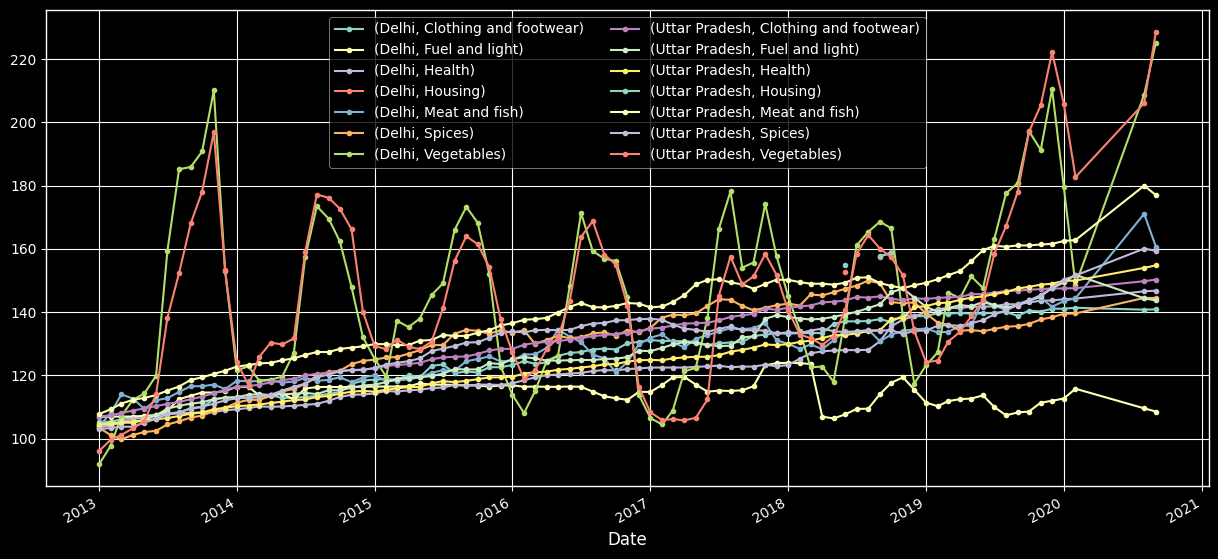

In [197]:
pltdata=cpi_data.set_index('Date').copy()
pltdata=pltdata[pltdata.State.isin(['Delhi', 'Uttar Pradesh'])]
pltdata=pltdata[pltdata.Description.isin(['Health', 'Meat and fish', 'Spices',
                                    'Clothing and footwear', 'Housing',
                                    'Fuel and light','Vegetables'])]

_=pltdata.groupby(['State', 'Description']).Combined.plot(legend=True, marker='o', markersize=3)
_=plt.legend(ncol=2)

## Air Passengers Data

In [855]:
pd.infer_freq(airpassengers_data.index)

'MS'

In [856]:
airpassengers_data.index=pd.PeriodIndex(airpassengers_data.index, freq='M')
airpassengers_data.index[:3]

PeriodIndex(['1949-01', '1949-02', '1949-03'], dtype='period[M]', name='Month', freq='M')

In [857]:
airpassengers_data.columns = ['Passengers']
airpassengers_data.head()

Passengers
Month              
1949-01         112
1949-02         118
1949-03         132
1949-04         129
1949-05         121

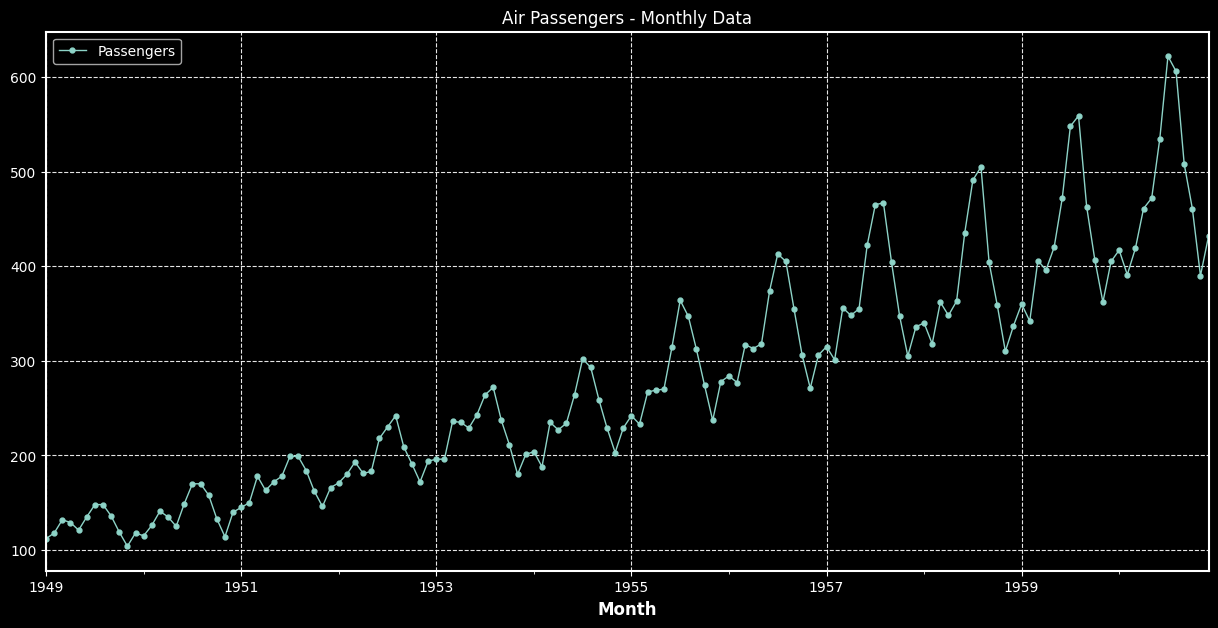

In [858]:
_=airpassengers_data.plot(marker='o', markersize=3.5,
                          title='Air Passengers - Monthly Data')

## Monthly Beer Production

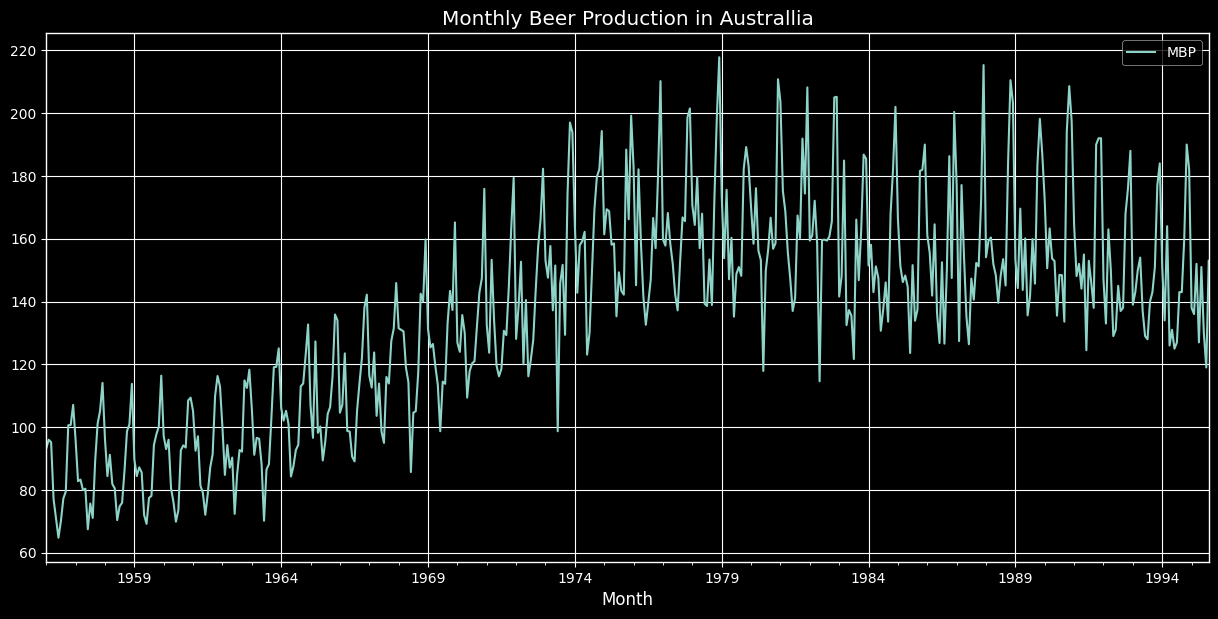

In [507]:
beerprod_data.columns = ['MBP']
_=beerprod_data.plot(title='Monthly Beer Production in Australlia')

## Housing Prices Data

In [1257]:
houseprices_data = houseprices_data.drop(['RegionID', 'SizeRank', 'StateName'], axis=1)
houseprices_data = houseprices_data[~houseprices_data.RegionName.duplicated()]
houseprices_data = houseprices_data.melt(id_vars='RegionName')
houseprices_data.columns=['Region', 'Month', 'Price']
houseprices_data.head()

Region    Month     Price
0     New York  2008-03       NaN
1  Los Angeles  2008-03  507600.0
2      Houston  2008-03  138400.0
3      Chicago  2008-03  325100.0
4  San Antonio  2008-03  130900.0

<b>Finding Those regions which are present in each month</b>

In [1258]:
persistent_regions = set(houseprices_data.Region.unique())
len(persistent_regions)

3158

In [1259]:
def find_regions(x):
    global persistent_regions
    persistent_regions = persistent_regions.difference(persistent_regions.difference(x))
_=houseprices_data.dropna().groupby('Month').Region.apply(set).apply(lambda x : find_regions(x))

In [1260]:
len(persistent_regions)

744

In [1261]:
print('Shape Before : ', houseprices_data.shape)
houseprices_data=houseprices_data[houseprices_data.Region.isin(persistent_regions)].copy()
print('Shape After : ', houseprices_data.shape)

Shape Before :  (457910, 3)
Shape After :  (107880, 3)


In [1262]:
houseprices_data.set_index(['Region', 'Month']).sort_index(level=0)

Price
Region   Month            
Abingdon 2008-03  261100.0
         2008-04  263700.0
         2008-05  248900.0
         2008-06  239300.0
         2008-07  232800.0
...                    ...
Zeeland  2019-11  219500.0
         2019-12  214900.0
         2020-01  222900.0
         2020-02  227600.0
         2020-03  233000.0

[107880 rows x 1 columns]

In [1263]:
houseprices_data.index = pd.PeriodIndex(houseprices_data.Month, freq='M')
houseprices_data.drop('Month', axis=1, inplace=True)
houseprices_data.head()

Region     Price
Month                        
2008-03     Chicago  325100.0
2008-03   Las Vegas  244400.0
2008-03      Dallas  148400.0
2008-03    Columbus  116000.0
2008-03  Louisville  124800.0

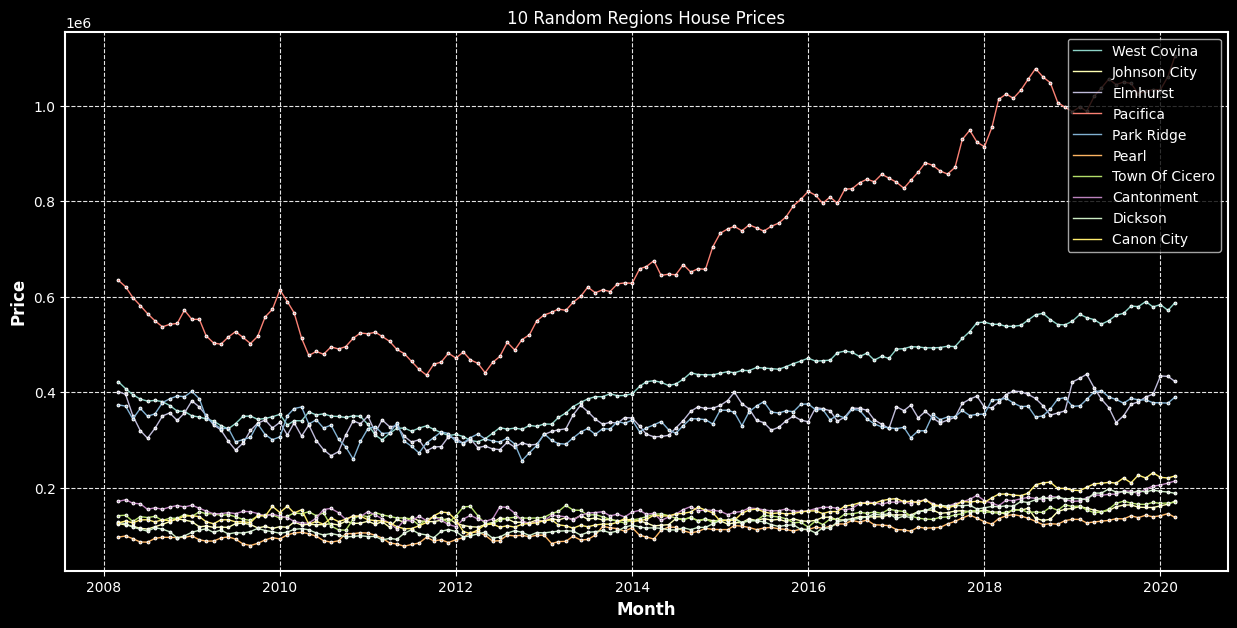

In [1264]:
pltdata = houseprices_data.copy()
random_regions = np.random.choice(pltdata.Region,10) # Pick 10 random regions
pltdata.index = pltdata.index.to_timestamp()
pltdata = pltdata[pltdata.Region.isin(random_regions)]
_=sns.lineplot(x='Month', y='Price', data=pltdata, hue='Region',
               marker='o', markersize=2)
_=plt.legend(loc=1)
_=plt.title('10 Random Regions House Prices')

## Britannia's Stock Prices

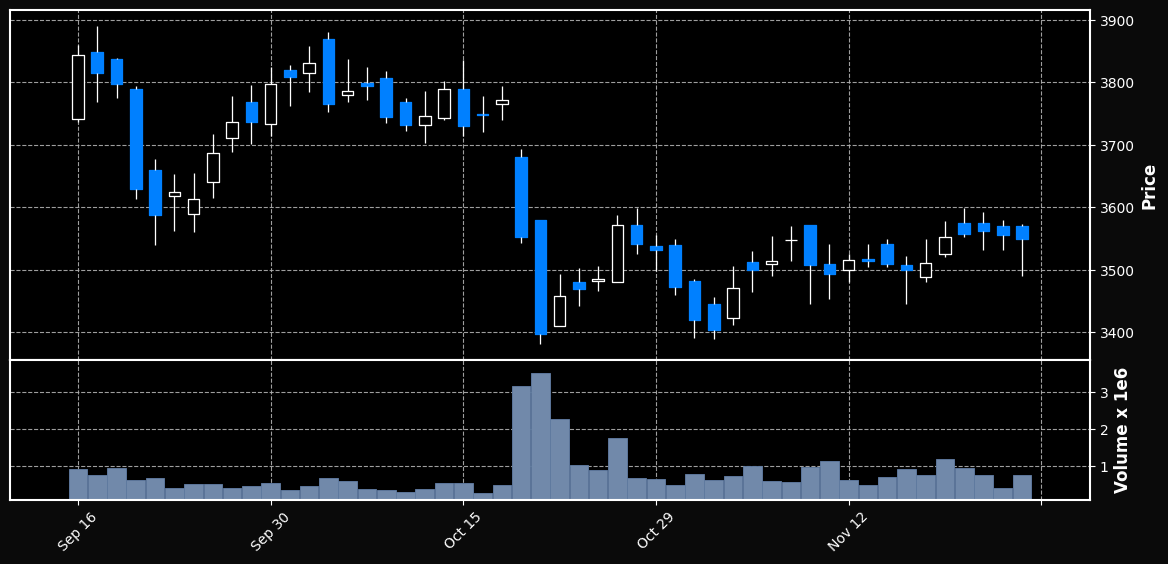

In [547]:
britanniastock_data = britanniastock_data[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
britanniastock_data=britanniastock_data.dropna()
mpl.plot(britanniastock_data[-50:], figsize=(15,7),
         type='candle', volume=True, style='mike')


## Air Gap Data

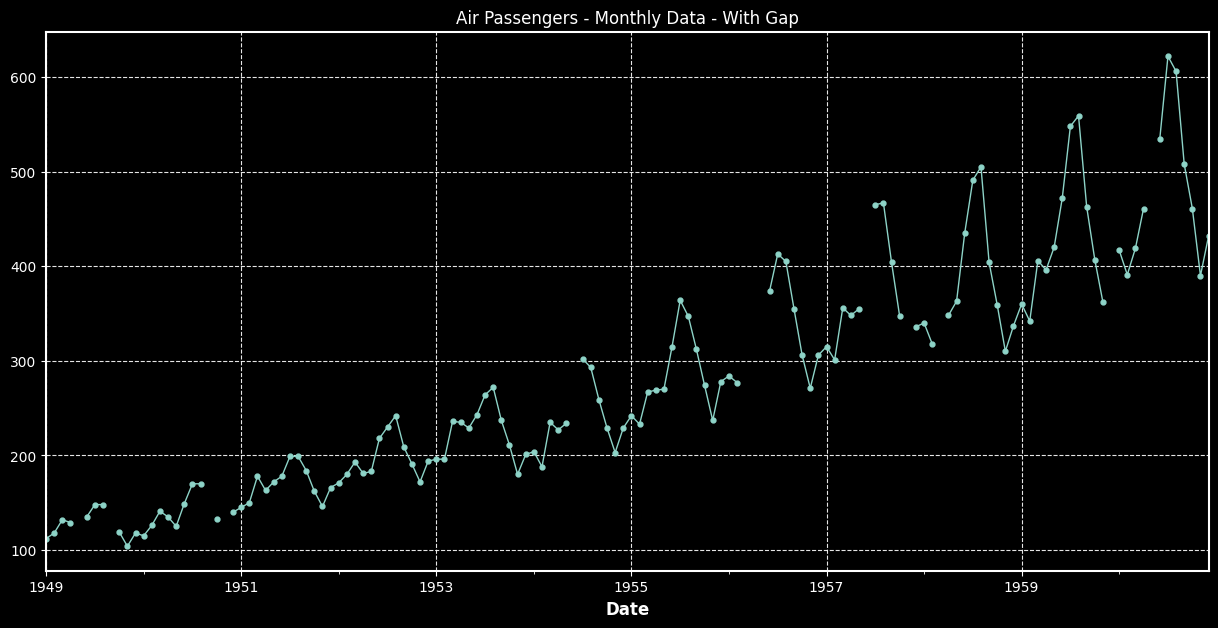

In [779]:
airgap_data = pd.read_csv(airgap_datapath, index_col=0, parse_dates=True)
airgap_data.columns = ['Passengers']
airgap_data.index.name = 'Date'
_=airgap_data.Passengers.plot(marker='o', markersize=3.5,
                              title='Air Passengers - Monthly Data - With Gap')

## Housing Data Gap

In [880]:
housepmiss_data = pd.read_csv(housepmiss_datapath, index_col=0)
housepmiss_data.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900  1.0  296     15.3   
2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671  2.0  242     17.8   
3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671  2.0  242     17.8   
4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622  3.0  222     18.7   
5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622  3.0  222     18.7   

        b  lstat  medv  
1  396.90   4.98  24.0  
2  396.90   9.14  21.6  
3  392.83   4.03  34.7  
4  394.63   2.94  33.4  
5  396.90   5.33  36.2

## Milk Production Dataset

In [1112]:
milkprod_data.columns = ['MilkProductionPounds']
milkprod_data.index = pd.to_datetime(milkprod_data.index)
milkprod_data.head()

MilkProductionPounds
Month                           
1962-01-01                   589
1962-02-01                   561
1962-03-01                   640
1962-04-01                   656
1962-05-01                   727

<AxesSubplot:xlabel='Month'>

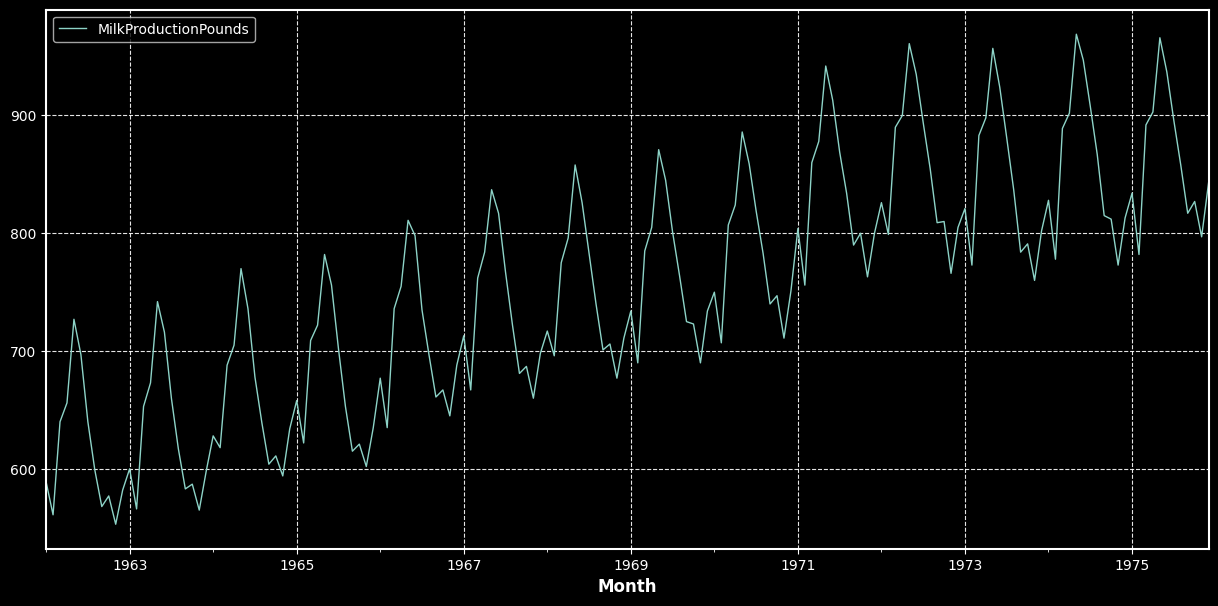

In [1113]:
milkprod_data.plot()

## Global Population and Energy Consumption Data

In [1233]:
popenergy_data.head()

Population  Coal_TWh  Oil_TWh  Gas_TWh  Hydropower_TWh  \
1960-01-01  3.067248e+10     15442    11097     4472             689   
1965-01-01  3.372133e+10     16140    18109     6303             923   
1966-01-01  3.446703e+10     16324    19496     6869             984   
1967-01-01  3.520994e+10     16061    20891     7375            1006   
1968-01-01  3.596666e+10     16301    22675     8044            1059   

            Nuclear_TWh  Solar_TWh  OtherRenewables_TWh  \
1960-01-01            0          0                    0   
1965-01-01           26          0                   18   
1966-01-01           34          0                   20   
1967-01-01           41          0                   20   
1968-01-01           52          0                   22   

            TraditionalBiomass_TWh  Wind_TWh  Biofuels_TWh  
1960-01-01                    8889         0             0  
1965-01-01                    9162         0             0  
1966-01-01                    9218         0             0  
1967-01-01                    9274         0             0  
1968-01-01                    9331         0             0

In [1234]:
popenergy_data['Renewable_Energy_TWh'] = popenergy_data[['Hydropower_TWh', 'Solar_TWh',
                                                        'OtherRenewables_TWh', 'TraditionalBiomass_TWh',
                                                        'Wind_TWh', 'Biofuels_TWh']].sum(axis=1)
popenergy_data['NonRenewable_Energy_TWh'] = popenergy_data[['Coal_TWh', 'Oil_TWh', 'Gas_TWh']].sum(axis=1)
popenergy_data['Nuclear_Energy_TWh'] = popenergy_data[['Nuclear_TWh']]
popenergy_data = popenergy_data[['Population', 'Renewable_Energy_TWh', 'NonRenewable_Energy_TWh', 'Nuclear_Energy_TWh']]
popenergy_data.head()

Population  Renewable_Energy_TWh  NonRenewable_Energy_TWh  \
1960-01-01  3.067248e+10                  9578                    31011   
1965-01-01  3.372133e+10                 10103                    40552   
1966-01-01  3.446703e+10                 10222                    42689   
1967-01-01  3.520994e+10                 10300                    44327   
1968-01-01  3.596666e+10                 10412                    47020   

            Nuclear_Energy_TWh  
1960-01-01                   0  
1965-01-01                  26  
1966-01-01                  34  
1967-01-01                  41  
1968-01-01                  52

## USA Consumer Price Index

In [1255]:
usacpi_data.index.name = 'Date'
usacpi_data.columns = ['CPI']
usacpi_data.head()

CPI
Date               
2007-10-01  209.190
2007-11-01  210.834
2007-12-01  211.445
2008-01-01  212.174
2008-02-01  212.687

<AxesSubplot:xlabel='Date'>

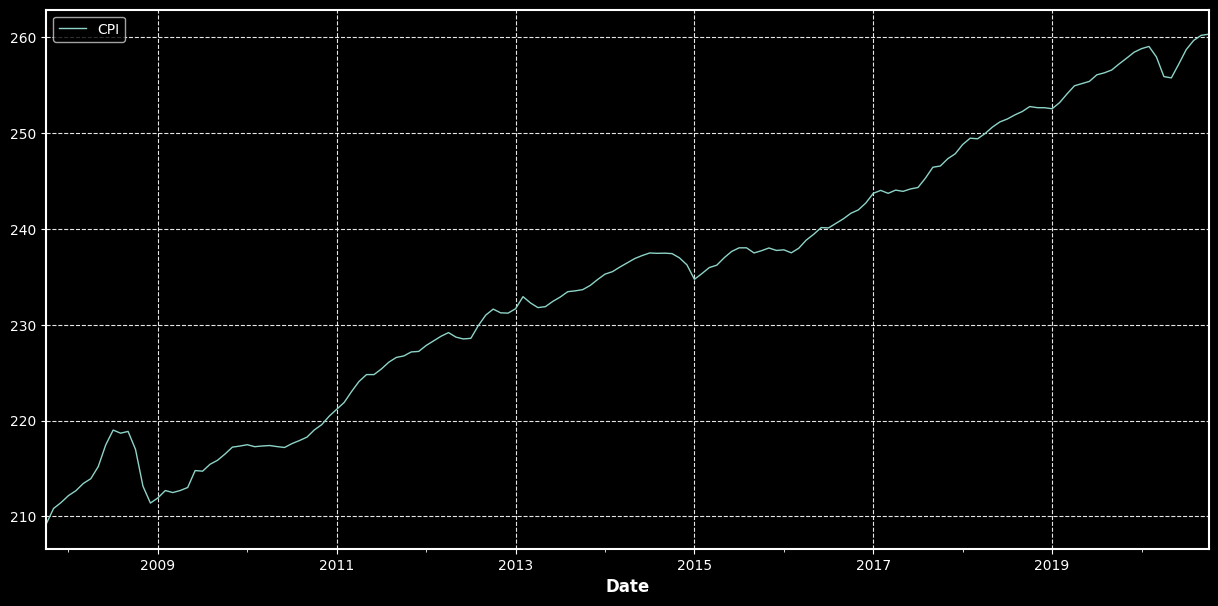

In [1256]:
usacpi_data.plot()

# Different Types of Data

 - Time Series Data : Data collected against a ***Single feature*** across an equally spaced time span.
 
 - Cross-Sectional Data : Data collected against ***Multiple features*** at a single point in time.
 
 - Panel Data : Recording data for ***Multiple features at eaqually spaced time intervals***

In [65]:
cpi_data.head()

Year    Month           State  Group Sub Group           Description  \
0  2013  January       ALL India    1.0    1.1.01  Cereals and products   
1  2013  January  Andhra Pradesh    1.0    1.1.01  Cereals and products   
2  2013  January           Assam    1.0    1.1.01  Cereals and products   
3  2013  January           Bihar    1.0    1.1.01  Cereals and products   
4  2013  January    Chhattisgarh    1.0    1.1.01  Cereals and products   

   Rural  Urban  Combined Status  Unnamed: 10  
0  107.5  110.5     108.4      F          NaN  
1  111.0  115.0     112.2      F          NaN  
2  103.9  105.6     104.1      F          NaN  
3  107.3  110.2     107.6      F          NaN  
4  103.2  109.3     104.9      F          NaN

<b>Time Series Data</b>

Notice the `Object` for data recording here is `State`, and the remainder are features.

Q) Can you tell what are the features of this dataset then?

In [67]:
tsdata = cpi_data[cpi_data.State.isin(['Delhi'])].copy()
tsdata = tsdata[:10].reset_index().drop('index', axis=1)
tsdata = tsdata.style.set_caption('Time Series Data') # Giving your data frame a title
tsdata

<b>Cross Sectional Data</b>

Notice the `Object` for data recording here is `State->Description`, and the remainder are features.


In [68]:
csdata = cpi_data[cpi_data.Date.isin(['2013-01-01'])].copy()
csdata = csdata[csdata.State.isin(['Delhi'])][:10]
csdata = csdata[:10].reset_index().drop('index', axis=1)
csdata = csdata.style.set_caption('Cross Sectional Data') # Giving your data frame a title
csdata

<b>Panel Data</b>

Notice the `Object` for data recording here is `State->Description`, and the remainder are features.



In [69]:
csdata = cpi_data[cpi_data.Date.isin(['2013-01-01', '2013-02-01'])].copy()
csdata = csdata[csdata.State.isin(['Delhi'])][:10]
csdata = csdata[:10].reset_index().drop('index', axis=1)
csdata = csdata.style.set_caption('Panel Data') # Giving your data frame a title
csdata

# Time Series Related Operations

 - Windows
 - Lags
 - Resampling
 - Differencing
 - Percentage Change
 - Imputation
 - Outlier Detection - #TODO


## Windows

- <b>Rolling Window</b> : Shifting a specified width window over the dataset.

- <b>Expanding Window</b> : Dynamic sized window that changes its window length in tandem with the dates, keeping the data from begining to the latest date, chronologically, in the window


<b>Rolling Window</b>

In [211]:
rolling_data = airpassengers_data.copy()

<AxesSubplot:xlabel='Month'>

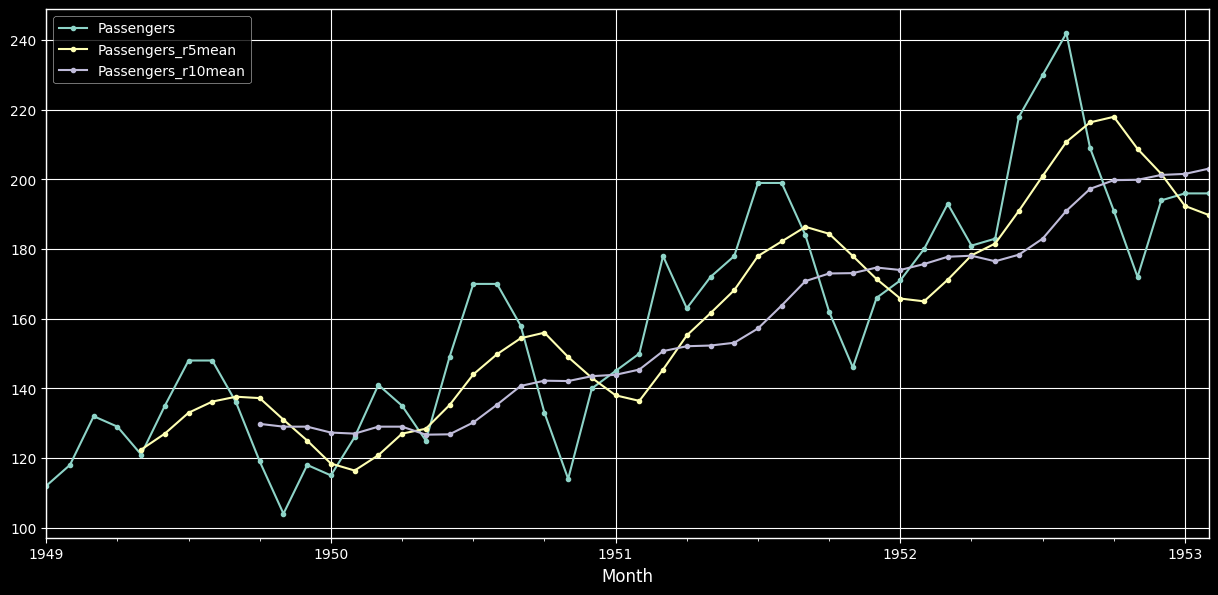

In [221]:
rolling_data['Passengers_r5mean'] = rolling_data.Passengers.rolling(5).mean()
rolling_data['Passengers_r10mean'] = rolling_data.Passengers.rolling(10).mean()
rolling_data[:50].plot(marker='o', markersize=3)

<b>Rolling Window</b> - Window Type

[scipy - Different Window Types](https://docs.scipy.org/doc/scipy/reference/signal.windows.html#module-scipy.signal.windows)

<img src='https://docs.scipy.org/doc/scipy/reference/_images/scipy-signal-windows-exponential-1_00.png' width='250' align='left'>

<img src='https://docs.scipy.org/doc/scipy/reference/_images/scipy-signal-windows-triang-1_00.png' width='250' align='left'>

<img src='https://docs.scipy.org/doc/scipy/reference/_images/scipy-signal-windows-gaussian-1_00.png' width='250' align='left'>



In [223]:
rolling_data = airpassengers_data.copy()

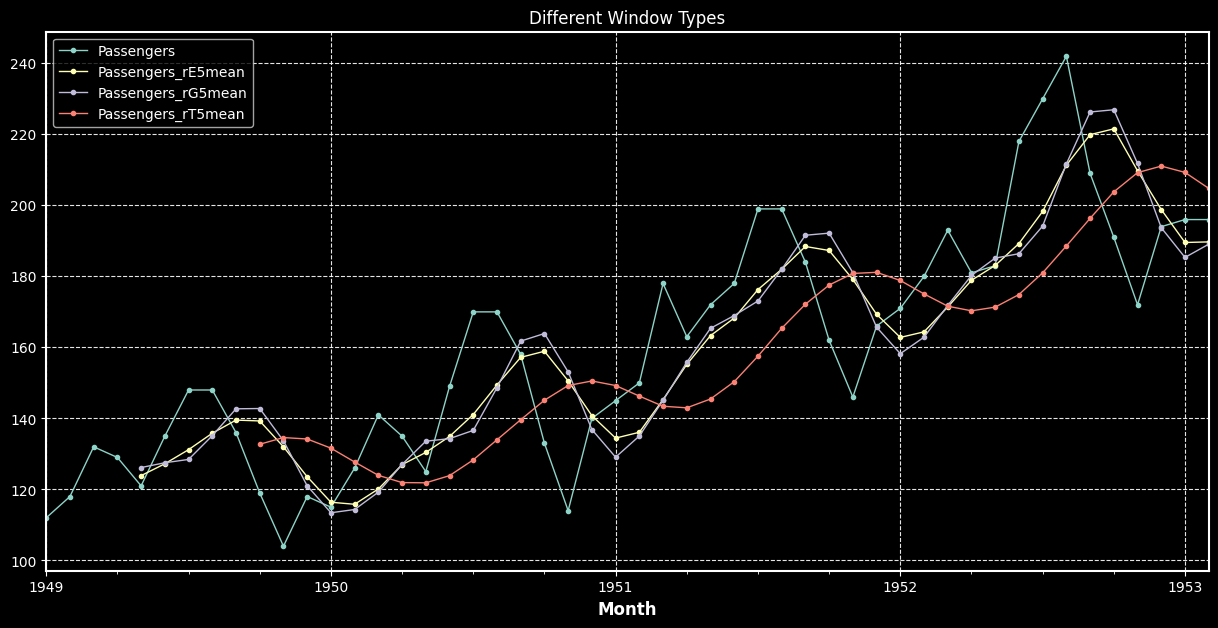

In [890]:
rolling_data['Passengers_rE5mean'] = rolling_data.Passengers.rolling(5, win_type='exponential').mean(tau=3)
rolling_data['Passengers_rG5mean'] = rolling_data.Passengers.rolling(5, win_type='gaussian').mean(std=1)
rolling_data['Passengers_rT5mean'] = rolling_data.Passengers.rolling(10, win_type='triang').mean()
_=rolling_data[:50].plot(marker='o', markersize=3, title='Different Window Types')

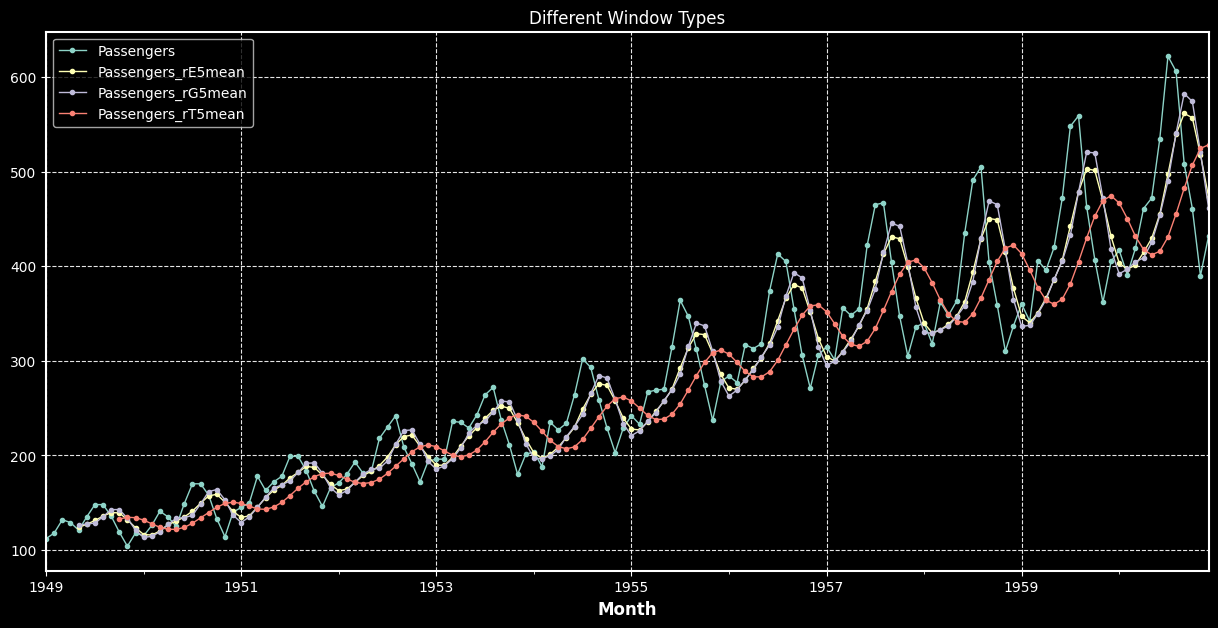

In [891]:
_=rolling_data.plot(marker='o', markersize=3, title='Different Window Types')

<b>Expanding Window</b>

In [235]:
expanding_data = airpassengers_data.copy()

Will there be any difference between the different windows for expanding windows?

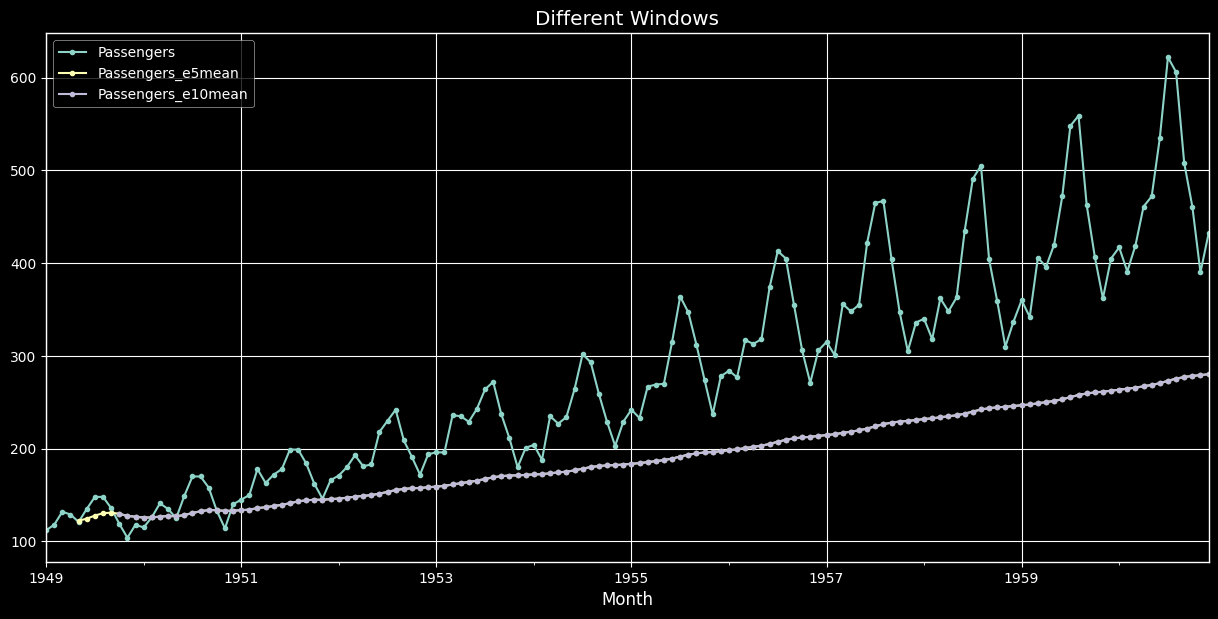

In [246]:
expanding_data['Passengers_e5mean'] = expanding_data.Passengers.expanding(5).mean()
expanding_data['Passengers_e10mean'] = expanding_data.Passengers.expanding(10).mean()
_=expanding_data.plot(marker='o', markersize=3, title='Different Windows')

Take a moment and think when is it that you will use Expanding Window and Rolling Window?
- Example Maximum DD uptil now, in a Trading Strategy.

## Lags

Since the time series data is collected over a period of time, datapoints adjacent of `Timestamps` might have relation with one another, hence it becomes appropriate to consider the `Lagged` values of time series in your analysis

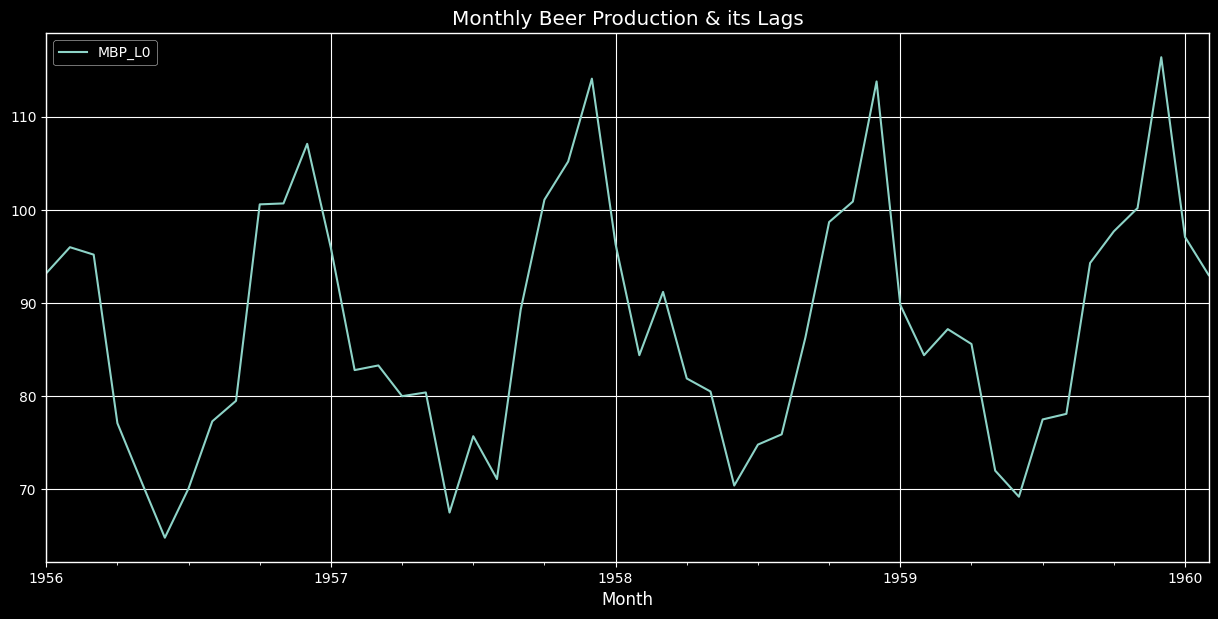

In [527]:
lagdata = beerprod_data.copy()
lagdata.columns = ['MBP_L0']
# lagdata['MBP_L1']  = lagdata.MBP_L0.shift(1)
# lagdata['MBP_L6']  = lagdata.MBP_L0.shift(6)
# lagdata['MBP_L12'] = lagdata.MBP_L0.shift(12)
# lagdata['MBP_L24'] = lagdata.MBP_L0.shift(24)
_=lagdata.dropna()[:50].plot(title='Monthly Beer Production & its Lags')

## Resampling
Changing frequency of the time series dataset, and applying aggregation functions over them

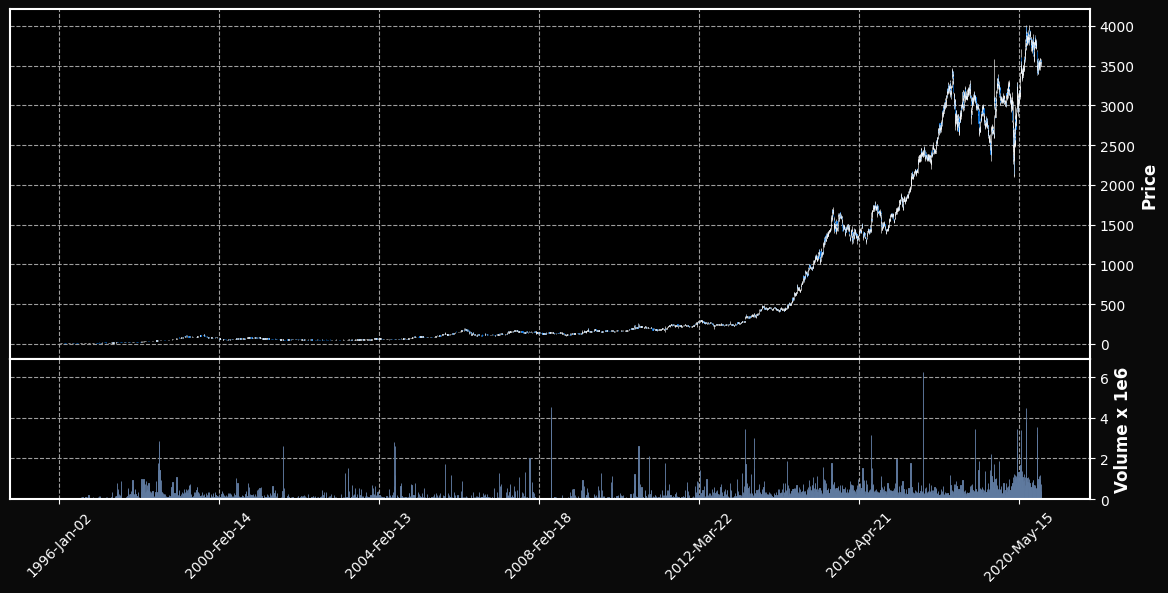

In [569]:
resampled_data = britanniastock_data.resample('2M').agg({'Open':'first',
                                                          'High':'max',
                                                          'Low':'min',
                                                          'Close':'last',
                                                          'Volume':'sum'})
mpl.plot(britanniastock_data, figsize=(15,7),
         type='candle', volume=True, style='mike')

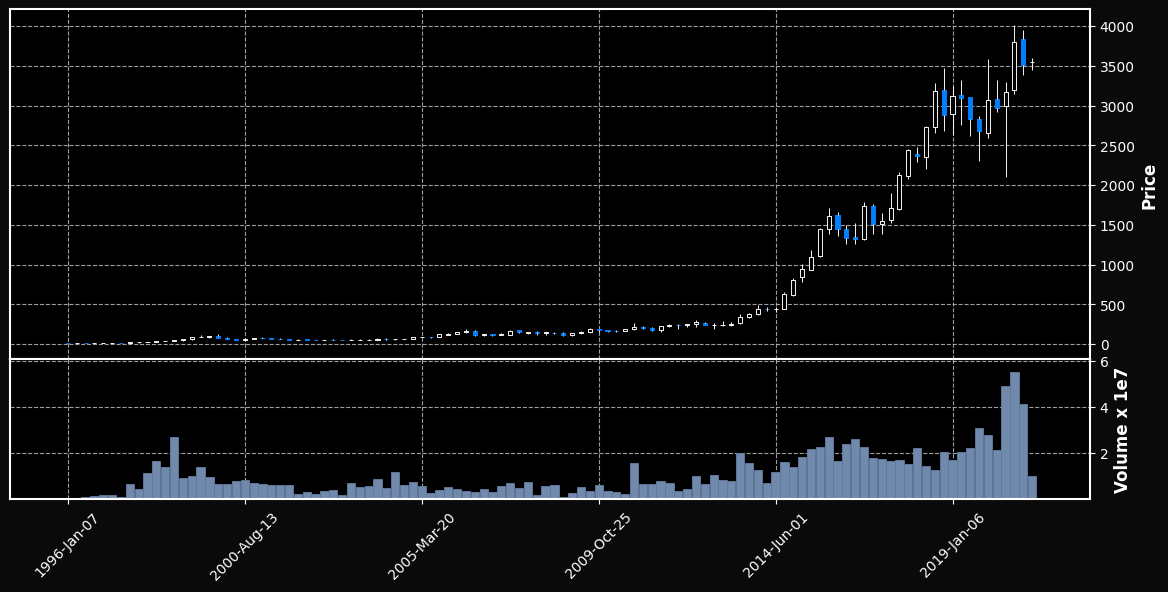

In [581]:
resampled_data = britanniastock_data.resample('12W', label='right').agg({'Open':'first',
                                                                        'High':'max',
                                                                        'Low':'min',
                                                                        'Close':'last',
                                                                        'Volume':'sum'})
mpl.plot(resampled_data, figsize=(15,7),
         type='candle', volume=True, style='mike')

In [579]:
britanniastock_data.resample('2W', label='right').agg({'Open':'first',
                                                          'High':'max',
                                                          'Low':'min',
                                                          'Close':'last',
                                                          'Volume':'sum'})

Open         High         Low        Close      Volume
Date                                                                     
1996-01-07    10.600000    10.666700    10.46670    10.473300     10500.0
1996-01-21    10.333300    10.533300     9.46667     9.866670     12000.0
1996-02-04     9.833330    11.466700     9.60000    11.466700     45000.0
1996-02-18    11.466700    13.666700    11.46670    12.700000    126000.0
1996-03-03    12.666700    13.666700    12.66670    13.333300    160500.0
...                 ...          ...         ...          ...         ...
2020-10-11  3710.899902  3879.949951  3689.00000  3745.100098   4149742.0
2020-10-25  3769.100098  3835.949951  3382.00000  3469.750000  12479419.0
2020-11-08  3482.000000  3599.800049  3390.00000  3513.550049   8129624.0
2020-11-22  3548.000000  3577.750000  3445.00000  3552.100098   7318391.0
2020-12-06  3575.000000  3599.000000  3490.00000  3548.750000   2833122.0

[651 rows x 5 columns]

## Differencing & Percentage Change

 - Differencing : Taking a <b>difference of the value at $t_{i}$ with $t_{i-n}$</b>, where n is the period
 - Percentage Change : <b>Change observed in the value at $t_{i}$ w.r.t $t_{i-n}$</b>, where n is the period


In [612]:
chicago_prices = houseprices_data[houseprices_data.Region=='Chicago'].copy()
chicago_prices.drop(['Region'], axis=1, inplace=True)
chicago_prices['Price_diffP1'] = chicago_prices.Price.diff(1)
chicago_prices['Price_diffP2'] = chicago_prices.Price.diff(2)

chicago_prices['Price_pctP1'] = chicago_prices.Price.pct_change(1)
chicago_prices['Price_pctP2'] = chicago_prices.Price.pct_change(2)
chicago_prices = chicago_prices.dropna()
chicago_prices.index = chicago_prices.index.to_timestamp()
chicago_prices.head()

Price  Price_diffP1  Price_diffP2  Price_pctP1  Price_pctP2
Month                                                                     
2008-05-01  286900.0      -27900.0      -38200.0    -0.088628    -0.117502
2008-06-01  274600.0      -12300.0      -40200.0    -0.042872    -0.127700
2008-07-01  268500.0       -6100.0      -18400.0    -0.022214    -0.064134
2008-08-01  264400.0       -4100.0      -10200.0    -0.015270    -0.037145
2008-09-01  267100.0        2700.0       -1400.0     0.010212    -0.005214

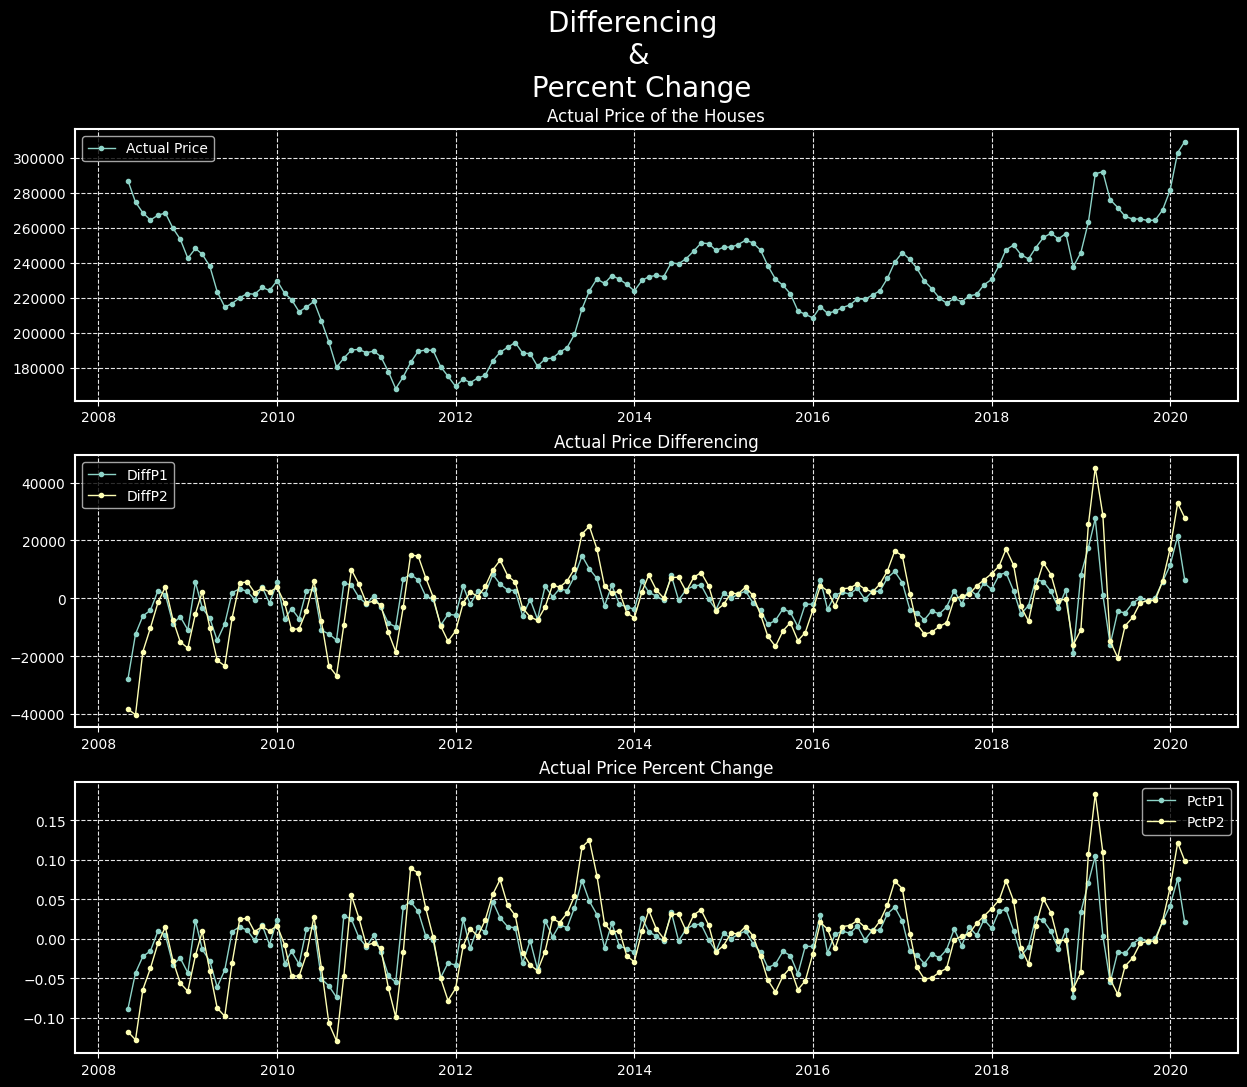

In [640]:
fig,axes = plt.subplots(3,1,figsize=(15,12))
_=axes[0].plot(chicago_prices.Price, marker='o', markersize=3, label='Actual Price')
_=axes[0].legend()
_=axes[0].set_title('Actual Price of the Houses')

_=axes[1].plot(chicago_prices.Price_diffP1, marker='o', markersize=3, label='DiffP1')
_=axes[1].plot(chicago_prices.Price_diffP2, marker='o', markersize=3, label='DiffP2')
_=axes[1].legend()
_=axes[1].set_title('Actual Price Differencing')

_=axes[2].plot(chicago_prices.Price_pctP1, marker='o', markersize=3, label='PctP1')
_=axes[2].plot(chicago_prices.Price_pctP2, marker='o', markersize=3, label='PctP2')
_=axes[2].legend()
_=axes[2].set_title('Actual Price Percent Change')

_=fig.suptitle('Differencing \n&\n Percent Change', fontsize=20)


## Imputation

Simply put, Filling in the Missing Values.

- fillna - Static Value Imputation
- bfill - Backward Fill
- ffill - Forward Fill
- interpolate - `spline`, `polynomial`, `linear`, `quadratic`, `barycentric`, `pchip`, `akima`, 
- rfimpute - Random Forest Imputation
- kNN - K Nearest Neighbours

NOTE : Be wary while usgin `polynomial` interpolation as it can induce ocsillations in the dataset, a phenomenon known as [Runge's phenomenon](https://en.wikipedia.org/wiki/Runge%27s_phenomenon)

<b>Interesting Read</b> : [Working with Missing Data](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#filling-with-a-pandasobject)


<b>Filling a Static Value for the NaN columns</b>

In [822]:
def get_uv_impplot(data, title):
    data=data.reset_index().copy()
    fig, axes = plt.subplots()
    from matplotlib.cm import get_cmap
    name = "Pastel1"
    cmap = get_cmap(name)
    colors = cmap.colors
    axes.set_prop_cycle(color=colors)
    for ecol in [k for k in data.columns if 'Imputed' in k]:
        sns.lineplot(x='Date', y=ecol, data=data, label=ecol,
                     linestyle='-.', marker='o', markersize=3, ax=axes)
    sns.lineplot(x='Date', y='Actual', data=data, label='Actual',
                 color='b', linestyle='-.', marker='o', markersize=3, ax=axes)
    axes.set_title(title)
    plt.close()
    return fig

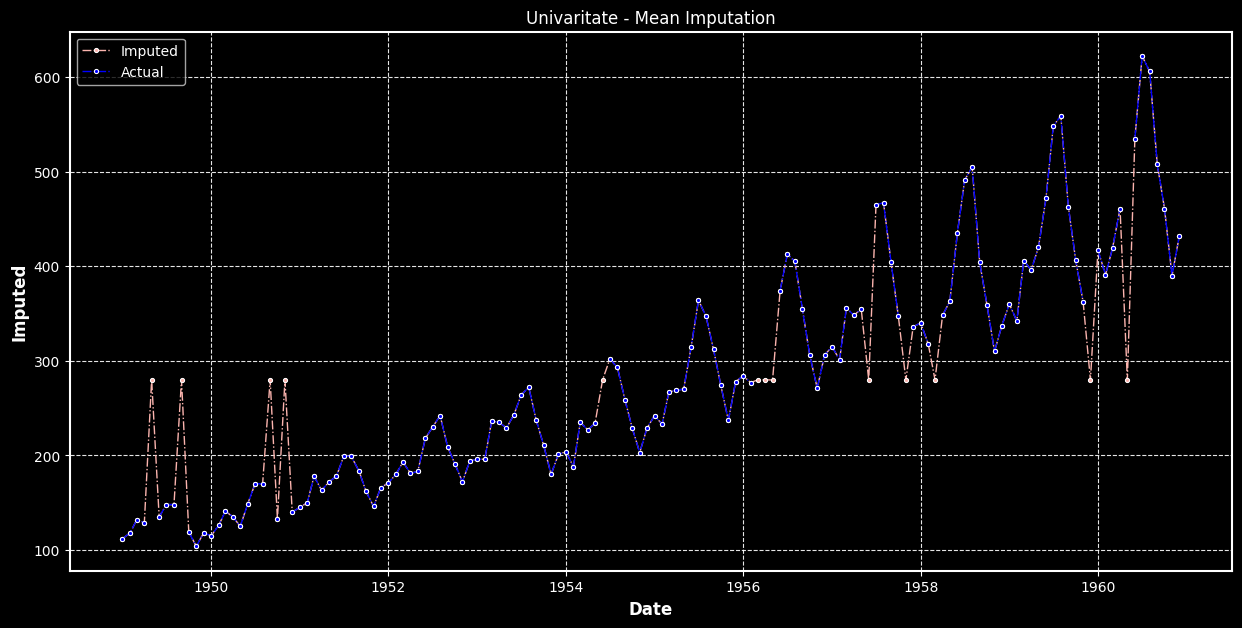

In [823]:
fillna_imputeUV = airgap_data.copy()
fillna_imputeUV.columns=['Actual']
fillna_imputeUV['Imputed'] = fillna_imputeUV.fillna(fillna_imputeUV.Actual.mean())

get_uv_impplot(fillna_imputeUV, title='Univaritate - Mean Imputation')

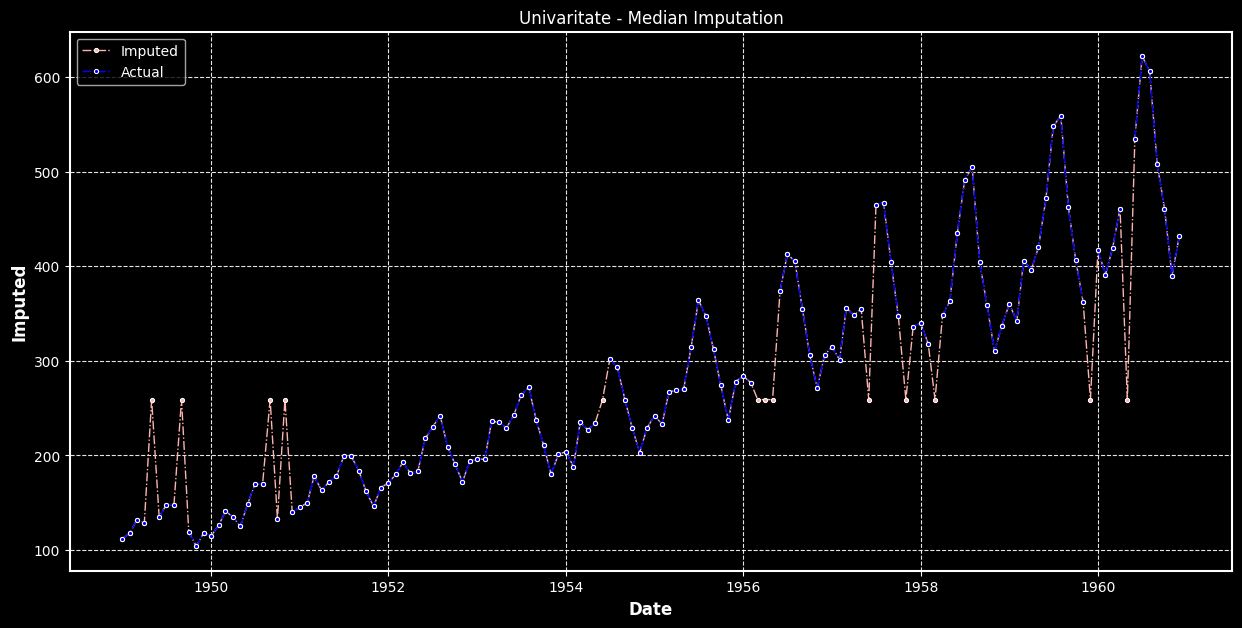

In [824]:
fillna_imputeUV = airgap_data.copy()
fillna_imputeUV.columns=['Actual']
fillna_imputeUV['Imputed'] = fillna_imputeUV.fillna(fillna_imputeUV.Actual.median())

get_uv_impplot(fillna_imputeUV, title='Univaritate - Median Imputation')

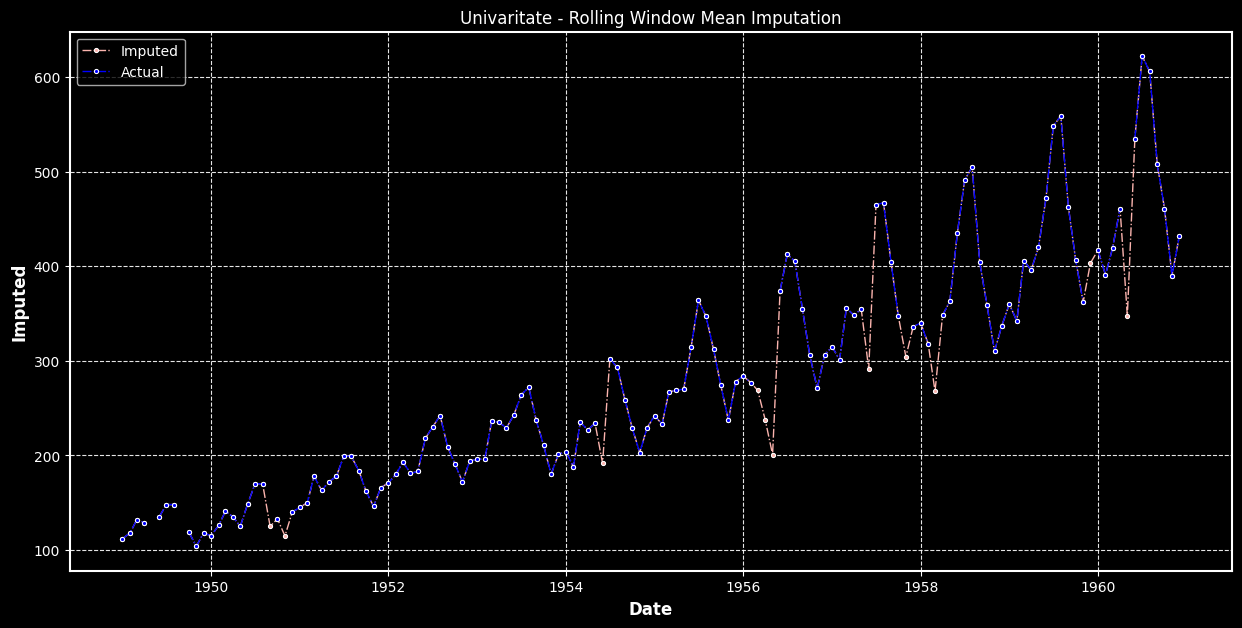

In [825]:
fillna_imputeUV = airgap_data.copy()
fillna_imputeUV.columns=['Actual']

fillna_imputeUV['Imputed'] = fillna_imputeUV.Actual.fillna(0).rolling(window=10).mean()
fillna_imputeUV['Imputed'] = fillna_imputeUV.apply(lambda x : \
                                                   x.Imputed if pd.isna(x.Actual) else x.Actual, axis=1)

get_uv_impplot(fillna_imputeUV, title='Univaritate - Rolling Window Mean Imputation')

<b>Forward and Backward Fill</b>

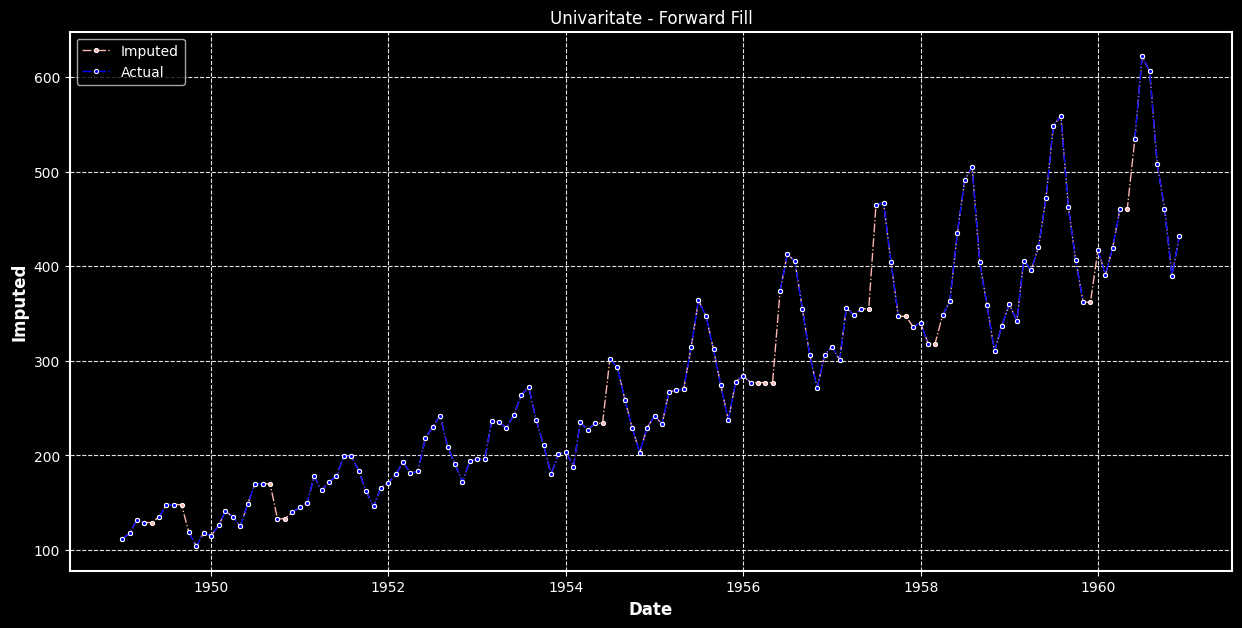

In [826]:
ffill_imputeUV = airgap_data.copy()
ffill_imputeUV.columns=['Actual']
ffill_imputeUV['Imputed'] = ffill_imputeUV.Actual.ffill()

get_uv_impplot(ffill_imputeUV, title='Univaritate - Forward Fill')

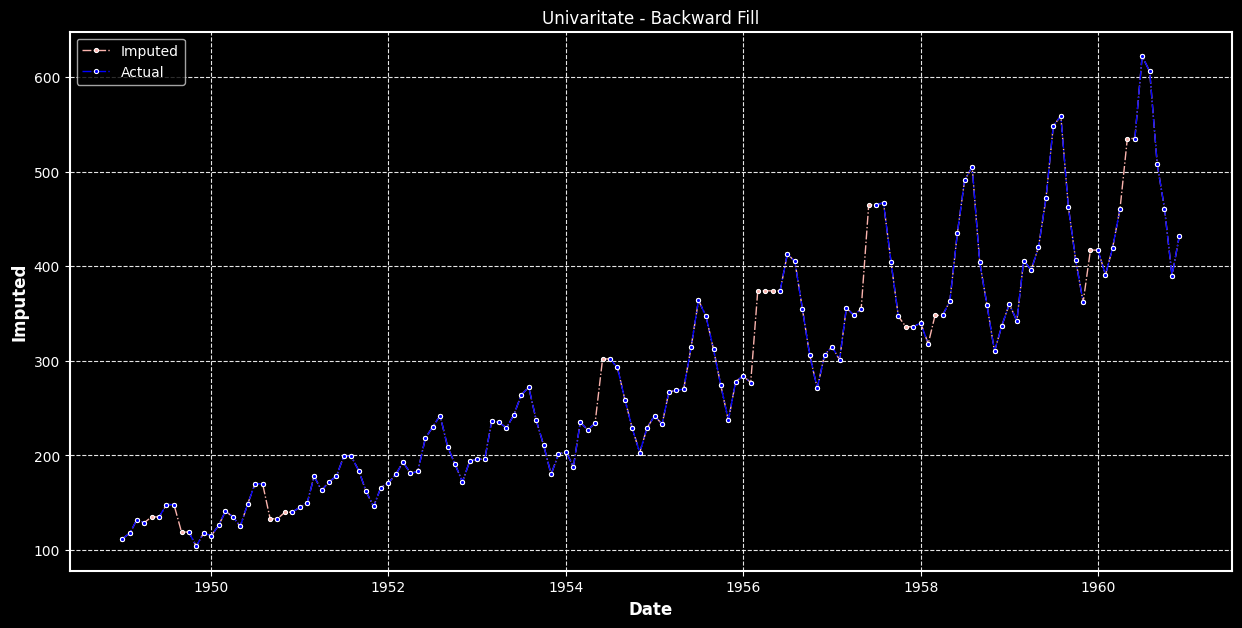

In [827]:
bfill_imputeUV = airgap_data.copy()
bfill_imputeUV.columns=['Actual']
bfill_imputeUV['Imputed'] = bfill_imputeUV.Actual.bfill()

get_uv_impplot(bfill_imputeUV, title='Univaritate - Backward Fill')

<b>Interpolation</b>

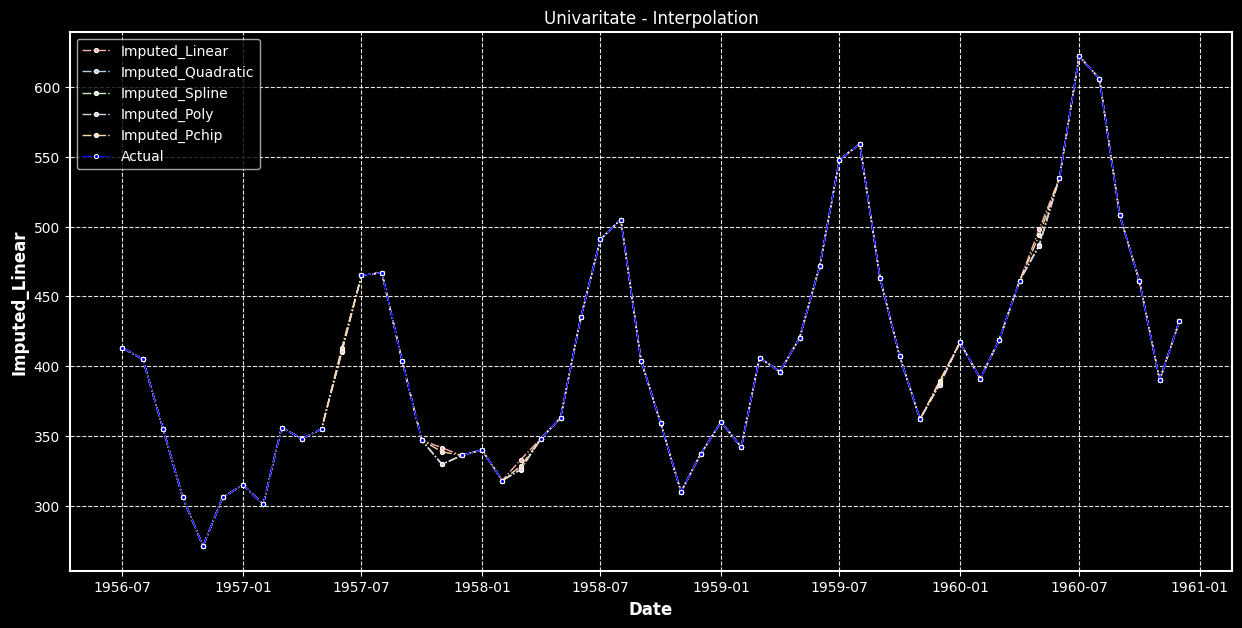

In [835]:
interp_imputeUV = airgap_data.copy()
interp_imputeUV.columns=['Actual']
interp_imputeUV['Imputed_Linear'] = interp_imputeUV.Actual.interpolate(method='linear')
interp_imputeUV['Imputed_Quadratic'] = interp_imputeUV.Actual.interpolate(method='quadratic')
interp_imputeUV['Imputed_Spline'] = interp_imputeUV.Actual.interpolate(method='spline', order=2)
interp_imputeUV['Imputed_Poly'] = interp_imputeUV.Actual.interpolate(method='polynomial', order=2)
interp_imputeUV['Imputed_Pchip'] = interp_imputeUV.Actual.interpolate(method='pchip')

get_uv_impplot(interp_imputeUV[90:], title='Univaritate - Interpolation')

<b>Now, lets calculate which method of interpolation is the best for the given dataset?</b>

In [841]:
imp_check = airgap_data.copy()
imp_check.columns=['Actual']
imp_check['Imputed_Linear'] = imp_check.Actual.interpolate(method='linear')
imp_check['Imputed_Quadratic'] = imp_check.Actual.interpolate(method='quadratic')
imp_check['Imputed_Spline'] = imp_check.Actual.interpolate(method='spline', order=2)
imp_check['Imputed_Poly'] = imp_check.Actual.interpolate(method='polynomial', order=2)
imp_check['Imputed_Pchip'] = imp_check.Actual.interpolate(method='pchip')
imp_check['Imputed_bfill'] = imp_check.Actual.bfill()
imp_check['Imputed_ffill'] = imp_check.Actual.ffill()

imp_check['Imputed_Rolling'] = imp_check.Actual.fillna(0).rolling(window=10).mean()
imp_check['Imputed_Rolling'] = imp_check.apply(lambda x : x.Imputed_Rolling if pd.isna(x.Actual) else x.Actual,
                                               axis=1)
imp_check['Imputed_Meanfill'] = imp_check.Actual.fillna(imp_check.Actual.mean())
imp_check['Imputed_Medialfill'] = imp_check.Actual.fillna(imp_check.Actual.median())
imp_check.head()


Actual  Imputed_Linear  Imputed_Quadratic  Imputed_Spline  \
Date                                                                    
1949-01-01   112.0           112.0         112.000000      112.000000   
1949-02-01   118.0           118.0         118.000000      118.000000   
1949-03-01   132.0           132.0         132.000000      132.000000   
1949-04-01   129.0           129.0         129.000000      129.000000   
1949-05-01     NaN           132.0         127.971802      128.276743   

            Imputed_Poly  Imputed_Pchip  Imputed_bfill  Imputed_ffill  \
Date                                                                    
1949-01-01    112.000000     112.000000          112.0          112.0   
1949-02-01    118.000000     118.000000          118.0          118.0   
1949-03-01    132.000000     132.000000          132.0          132.0   
1949-04-01    129.000000     129.000000          129.0          129.0   
1949-05-01    127.971802     130.631465          135.0          129.0   

            Imputed_Rolling  Imputed_Meanfill  Imputed_Medialfill  
Date                                                               
1949-01-01            112.0        112.000000               112.0  
1949-02-01            118.0        118.000000               118.0  
1949-03-01            132.0        132.000000               132.0  
1949-04-01            129.0        129.000000               129.0  
1949-05-01              NaN        279.816794               259.0

In [871]:
sse_df = pd.DataFrame(columns=['SSE'])
actual_data = airpassengers_data.copy()
actual_data.index = actual_data.index.to_timestamp()
sse_df.index.name = 'Imputation Type'
for ecol in [k for k in imp_check.columns if 'Imputed' in k]:
    imputation_name = " ".join(ecol.split('_'))
    score = ((imp_check[ecol]-actual_data['Passengers'])**2).sum()
    sse_df.loc[imputation_name, 'SSE'] = score


In [872]:
sse_df

SSE
Imputation Type            
Imputed Linear      5337.62
Imputed Quadratic   4649.13
Imputed Spline      4759.91
Imputed Poly        4649.13
Imputed Pchip       5231.62
Imputed bfill         20455
Imputed ffill         16349
Imputed Rolling       69469
Imputed Meanfill     172642
Imputed Medialfill   181164

<b>But do you think this is the right way to assess which `Interpolation` method to use?</b>

Ans) No!, we wont have the actual data to compare it with, Which Interpolation method to use is something that is very specific to the `Domain Knowledge` of the Time Series problem we are working on.

<b>Imputing missing data in Multivariate Dataset</b>

- Random Forest Imputation using Proximity Matrix, **Interesting Course :** [Intro To Machine Learning by Jeremy Howards & Rachel](https://course18.fast.ai/ml.html)
- KNN Imputation : **Interesting Read :** [sklearn docs](https://scikit-learn.org/stable/modules/impute.html#nearest-neighbors-imputation)

In [887]:
from missingpy import MissForest, KNNImputer
imputer = MissForest()
X_imputed = imputer.fit_transform(housepmiss_data.values)
X_imputed_DF = pd.DataFrame(X_imputed, columns=housepmiss_data.columns)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


In [889]:
import numpy as np
from sklearn.impute import KNNImputer
nan = np.nan
imputer = KNNImputer(n_neighbors=2, weights="uniform")
X_imputed = imputer.fit_transform(housepmiss_data.values)
X_imputed_DF = pd.DataFrame(X_imputed, columns=housepmiss_data.columns)
X_imputed_DF

crim    zn  indus  chas    nox     rm   age     dis  rad    tax  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

## Outlier Detection (Anomally Detection)

## Smoothing Operations

 - Moving Average
 - Exponential Smoothing
 - Holt Winter Exponential Smoothing
 - Fourier Smoothing

In [1034]:
smoothedMA_data = beerprod_data.copy()
smoothedMA_data.columns = ['MBP']
smoothedMA_data['SmoothedData'] = np.nan
smoothedMA_data.head()

MBP  SmoothedData
Month                         
1956-01-01  93.2           NaN
1956-02-01  96.0           NaN
1956-03-01  95.2           NaN
1956-04-01  77.1           NaN
1956-05-01  70.9           NaN

<b>Moving Average Smoothing</b>

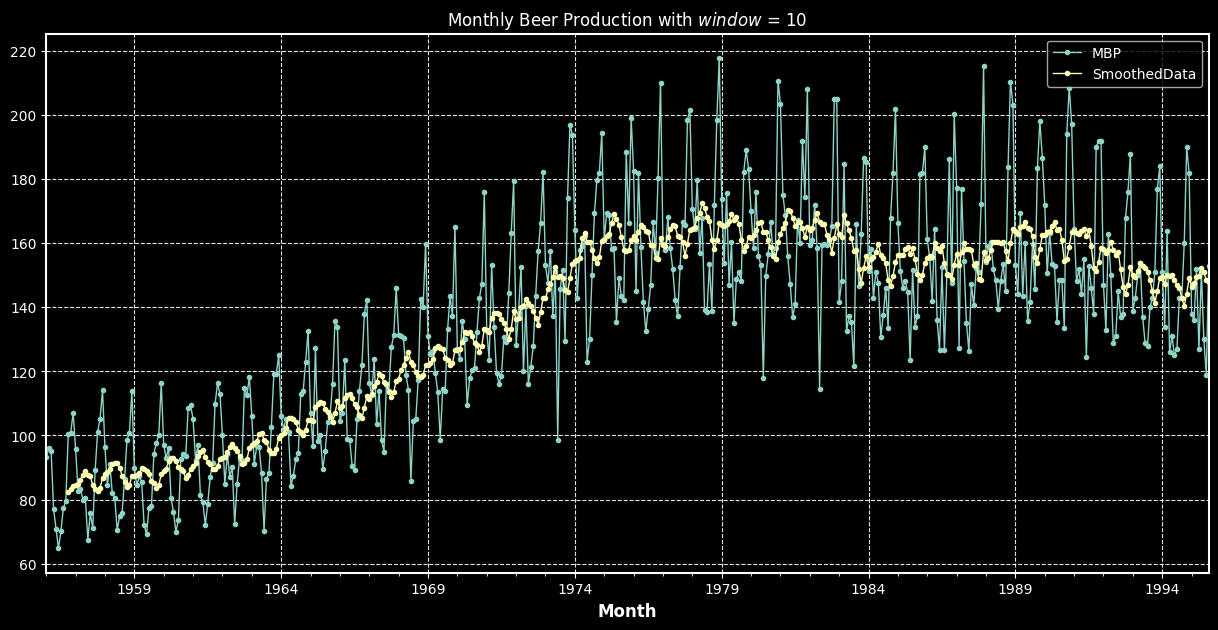

In [920]:
window_size = 10
smoothedMA_data['SmoothedData'] = smoothedMA_data.MBP.rolling(window=window_size).mean()

_=smoothedMA_data.plot(title=f'Monthly Beer Production with $window$ = {window_size}', 
                       linestyle='-', marker='o', markersize=3)

<b>Exponential Smoothing</b>

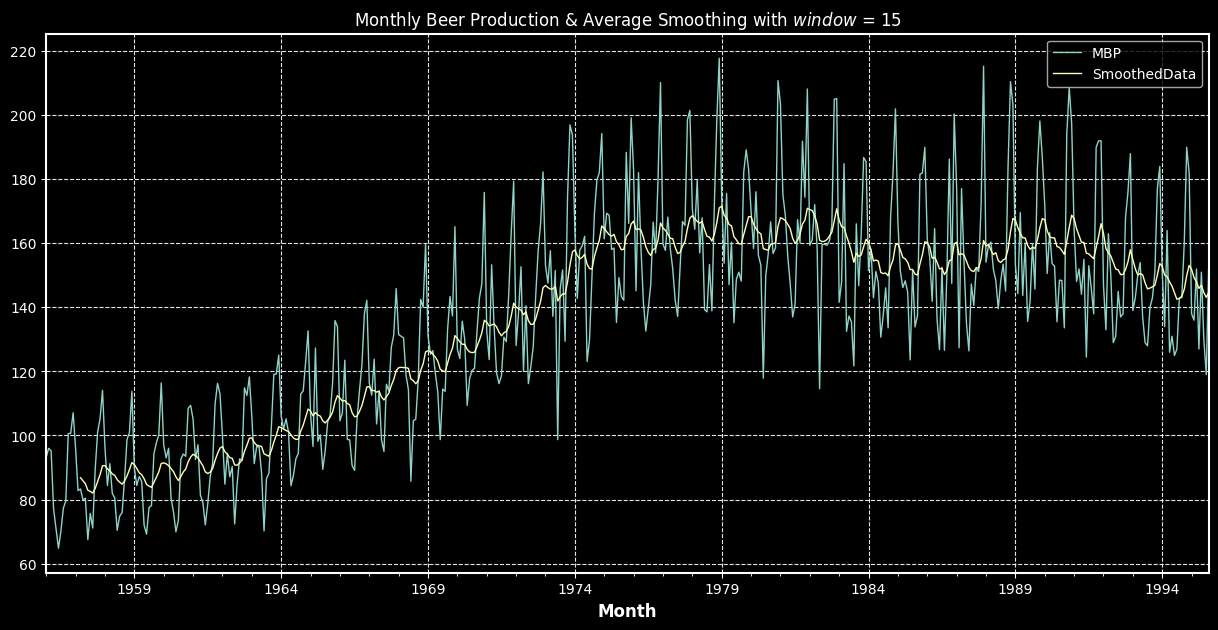

In [1009]:
# Custom Definition of weights
window_size = 15
win_weights = np.diff(np.geomspace(1,2, window_size+1)-1)
def get_exp(x):
    global win_weights
    return sum(x.values*win_weights)

rolling = smoothedMA_data.MBP.rolling(window=window_size)
smoothedMA_data['SmoothedData'] = rolling.apply(lambda x : get_exp(x))

_=smoothedMA_data.plot(title=f'Monthly Beer Production & Average Smoothing with $window$ = {window_size}', 
                       linestyle='-',)

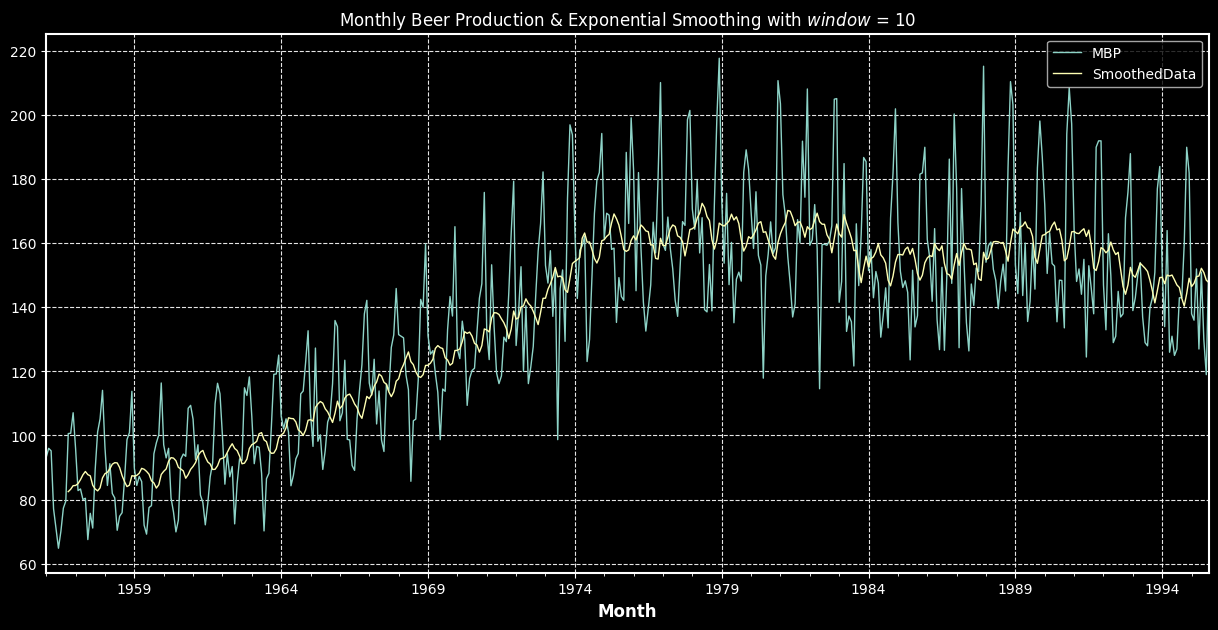

In [1011]:
# pandas ewm
window_size = 10
smoothedMA_data['SmoothedData'] = smoothedMA_data.MBP.rolling(window=window_size).mean()

_=smoothedMA_data.plot(title=f'Monthly Beer Production & Exponential Smoothing with $window$ = {window_size}', 
                       linestyle='-')

<b>Fourier Smoothing</b>

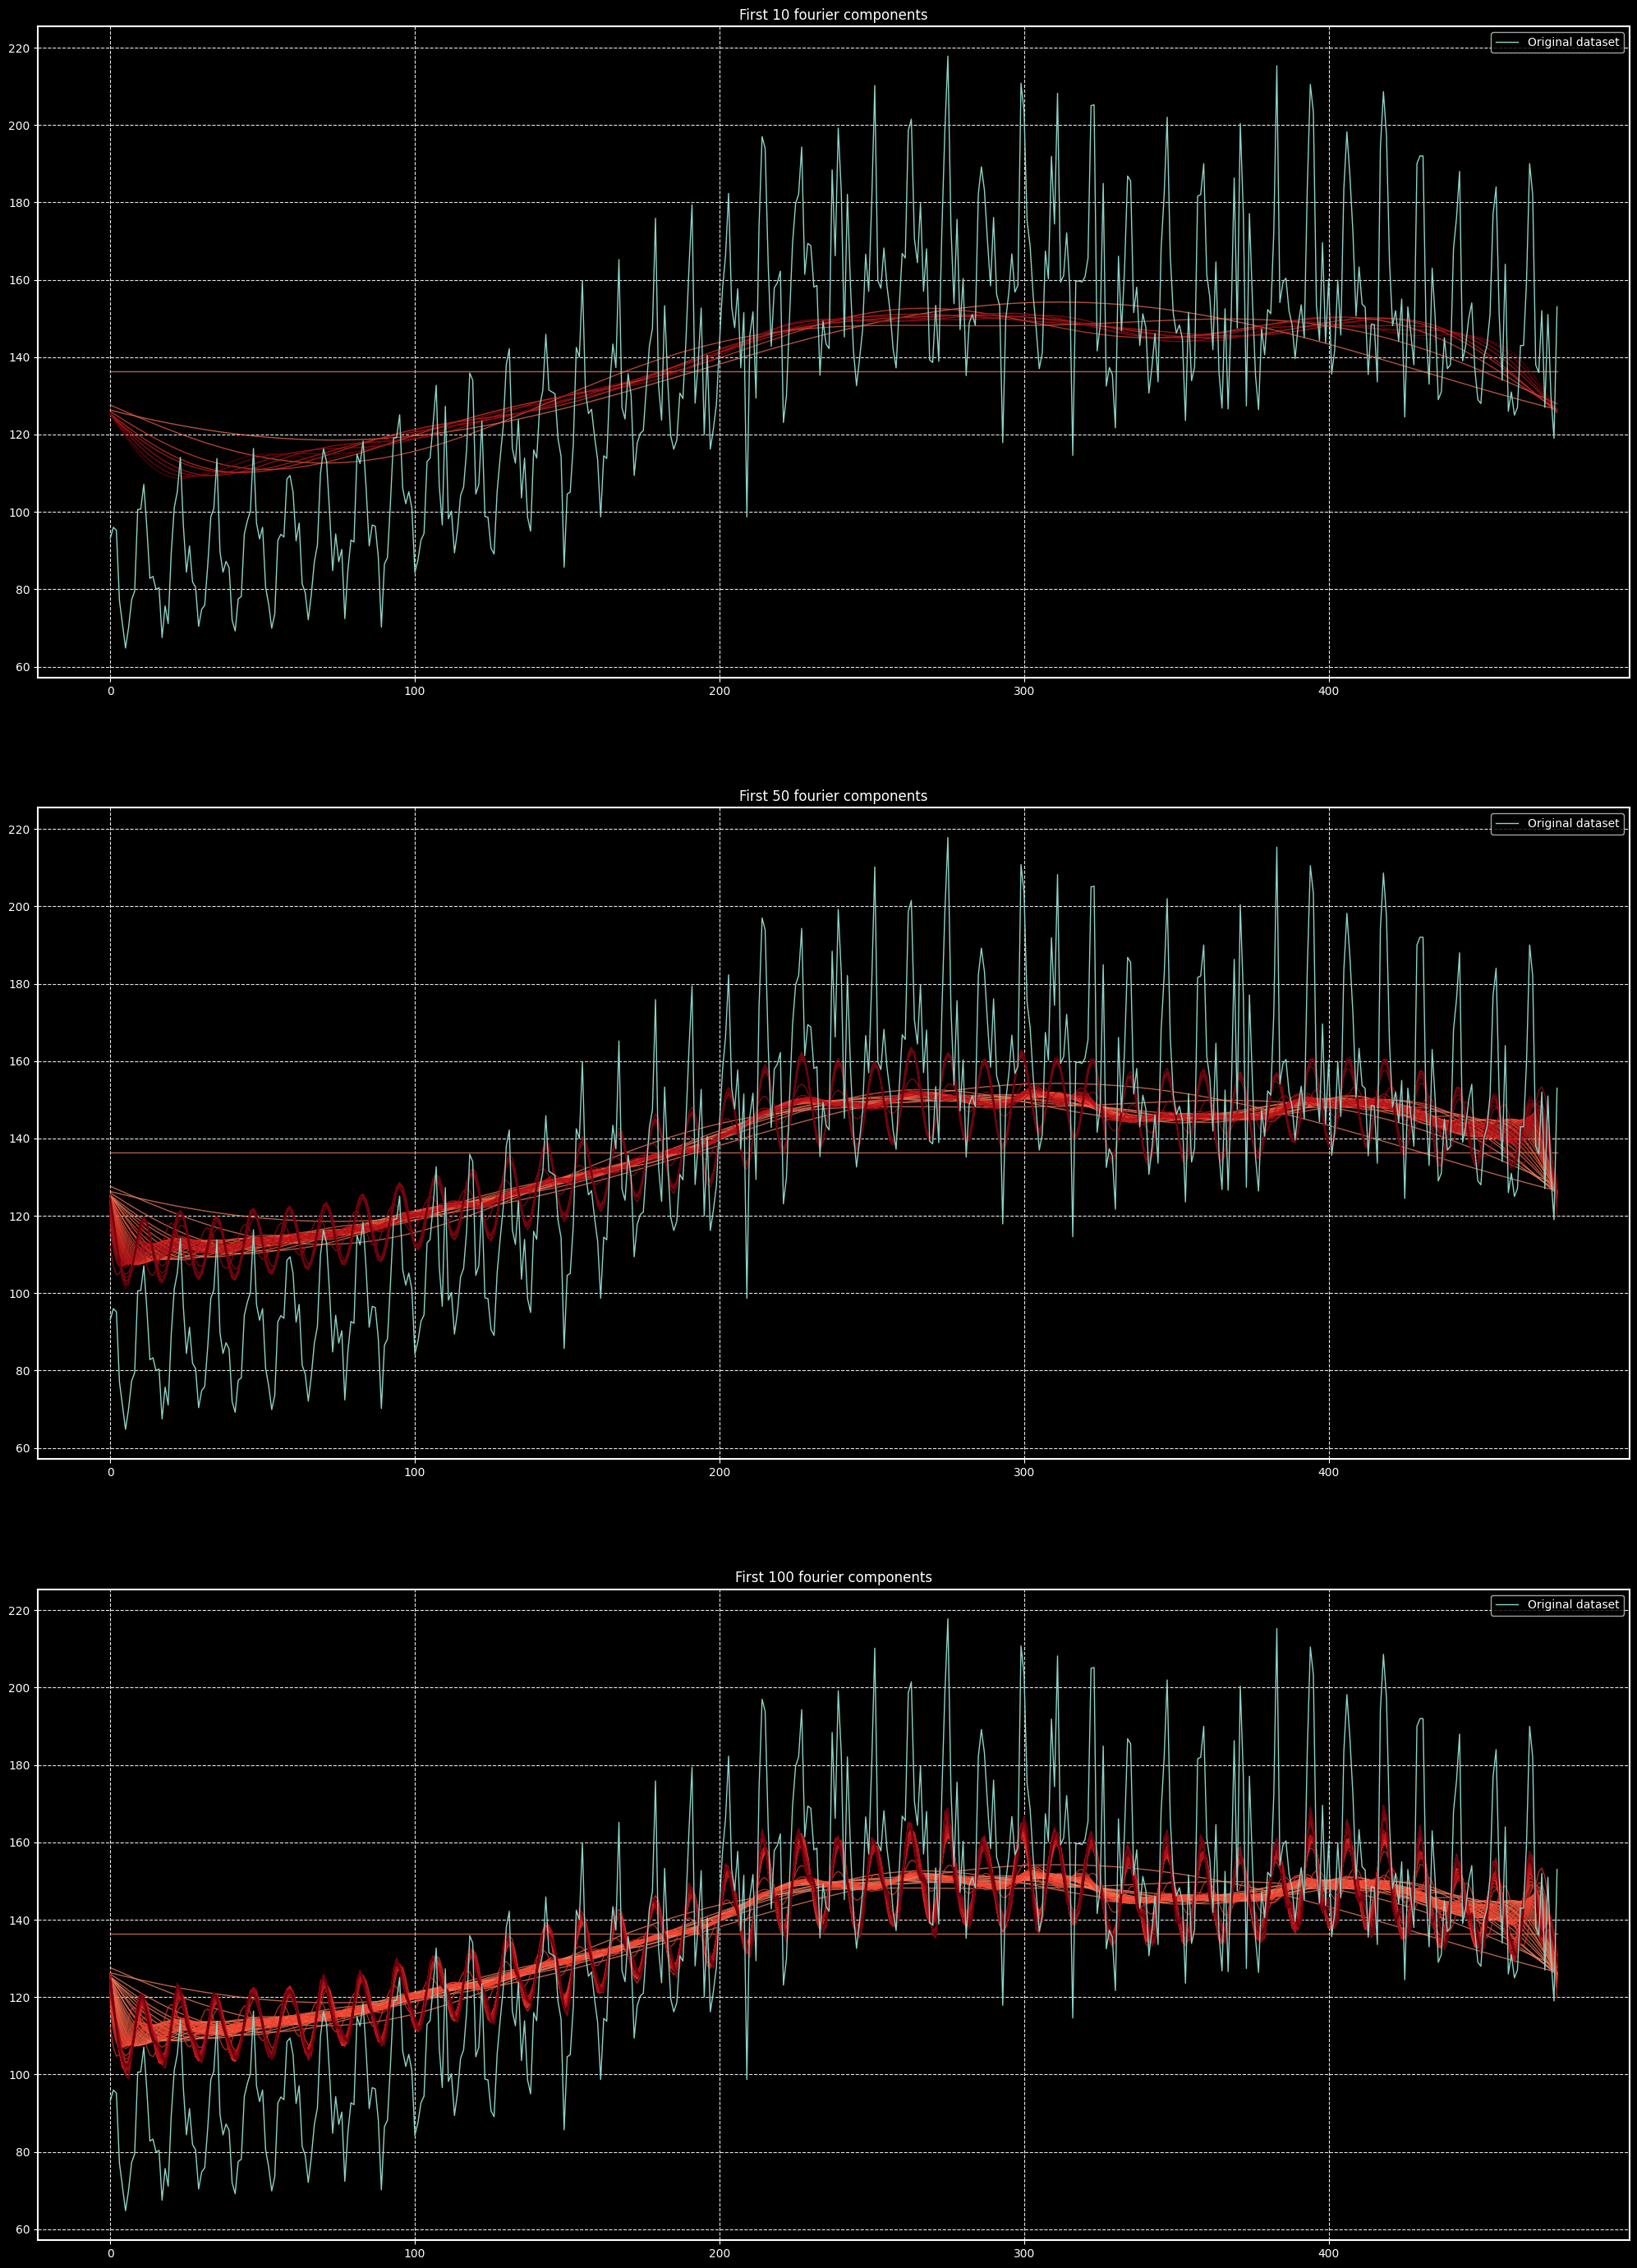

In [1048]:
# Inspired from : https://dsp.stackexchange.com/a/49233/47462

y = smoothedMA_data.MBP.values
n = len(y)
x = np.linspace(start=0, stop=n-1, num=n)

fig, axes  = plt.subplots(3,1, figsize=(25,35))

COMPONENTS = [10, 50, 100]

for idx, c in enumerate(COMPONENTS):
    colors = np.linspace(start=100, stop=255, num=c)
    for i in range(c):
        Y = np.fft.fft(y)
        np.put(Y, range(i+1, n), 0.0)
        ifft = np.fft.ifft(Y)
        axes[idx].plot(x, ifft.real, color=plt.cm.Reds(int(colors[i])), alpha=.70)
        smoothedMA_data['SmoothedData'] = ifft.real

    axes[idx].set_title("First {c} fourier components".format(c=c))
    axes[idx].plot(x,y, label="Original dataset")
    axes[idx].grid(linestyle='dashed')
    axes[idx].legend()


## Transformation & Adjustment Operations

We usually induldge in the adjustments and transformations because we want to make our time series data much more smoother and simpler, as simpler patterns usually make for much more accurate forecast.

- Calendar Adjustments
- Population Adjustments
- Inflation Adjustments
- Power Transforms
- Differencing
- Standardization
- Normalization


[Data transformations and forecasting models: what to use and when](https://people.duke.edu/~rnau/whatuse.htm)

In [1142]:
transformData1 = beerprod_data.copy()
transformData1.columns = ['Actual']

transformData2 = milkprod_data.copy()
transformData2.columns = ['Actual']

def get_transformed_plot(data, title):
    data=data.reset_index().copy()
    fig, axes = plt.subplots(2,1, figsize=(15,12))
    adjCol = [k for k in data.columns if 'Adjusted' in k][0]
    axes[0].plot(data.index, data.Actual)
    axes[1].plot(data.index, data[adjCol], color='lightgray')
    fig.suptitle(title, fontsize=20)
    plt.close()
    return fig

### Calendar Adjustment's
- Removes the variation in the dataset due to the intermittent variation in frequency related properties for ex :  different `number of days in a month`
- Makes time series much more simpler to forecast

In [1143]:
transformData1['CalendarAdjusted'] = transformData1.Actual/transformData1.index.daysinmonth
transformData2['CalendarAdjusted'] = transformData2.Actual/transformData2.index.daysinmonth

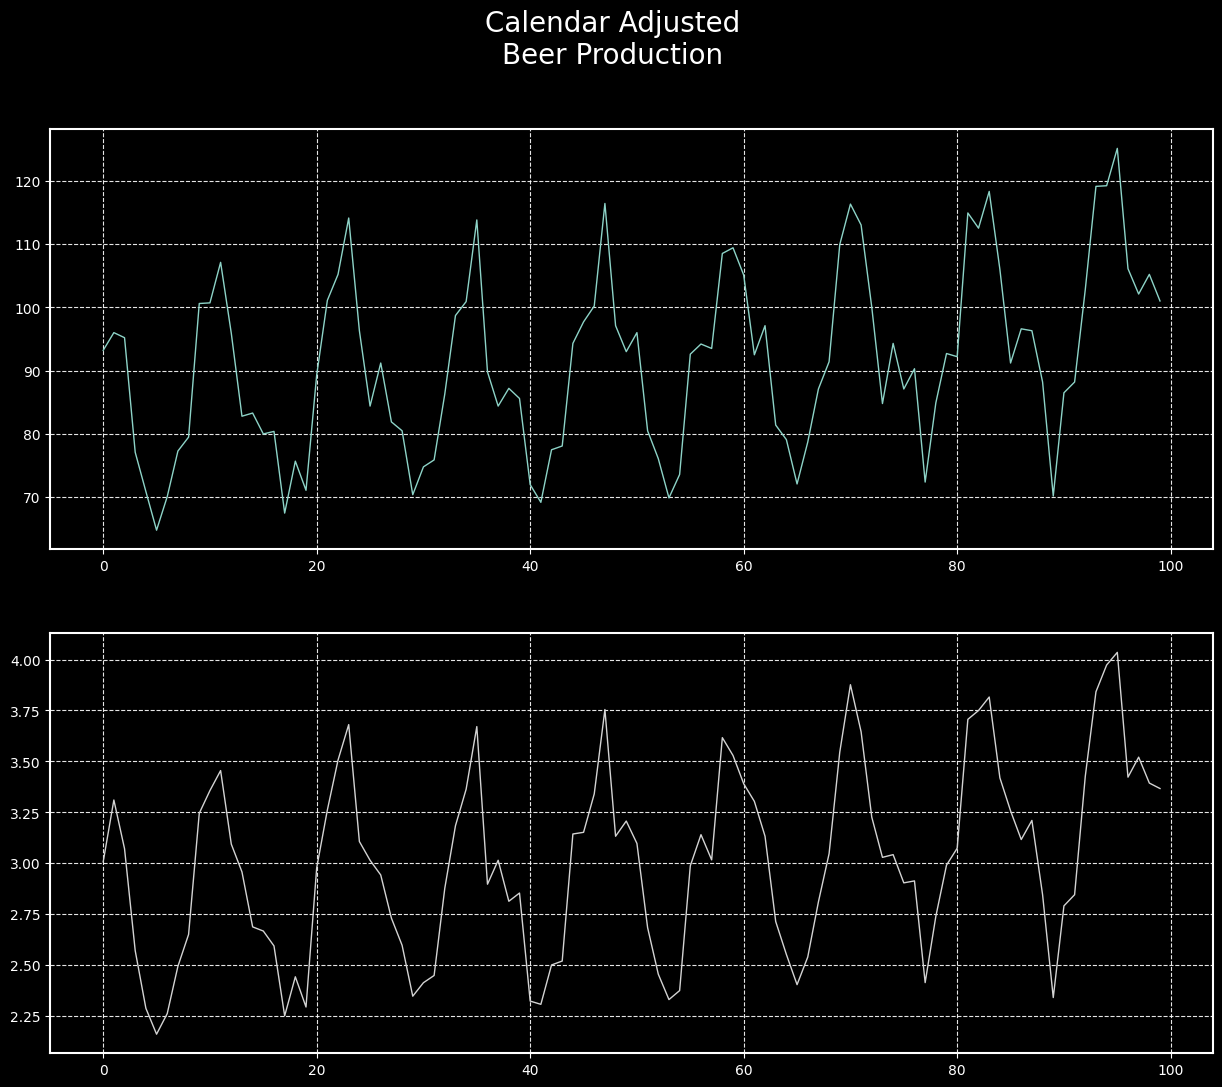

In [1144]:
get_transformed_plot(transformData1[:100], 'Calendar Adjusted\nBeer Production')

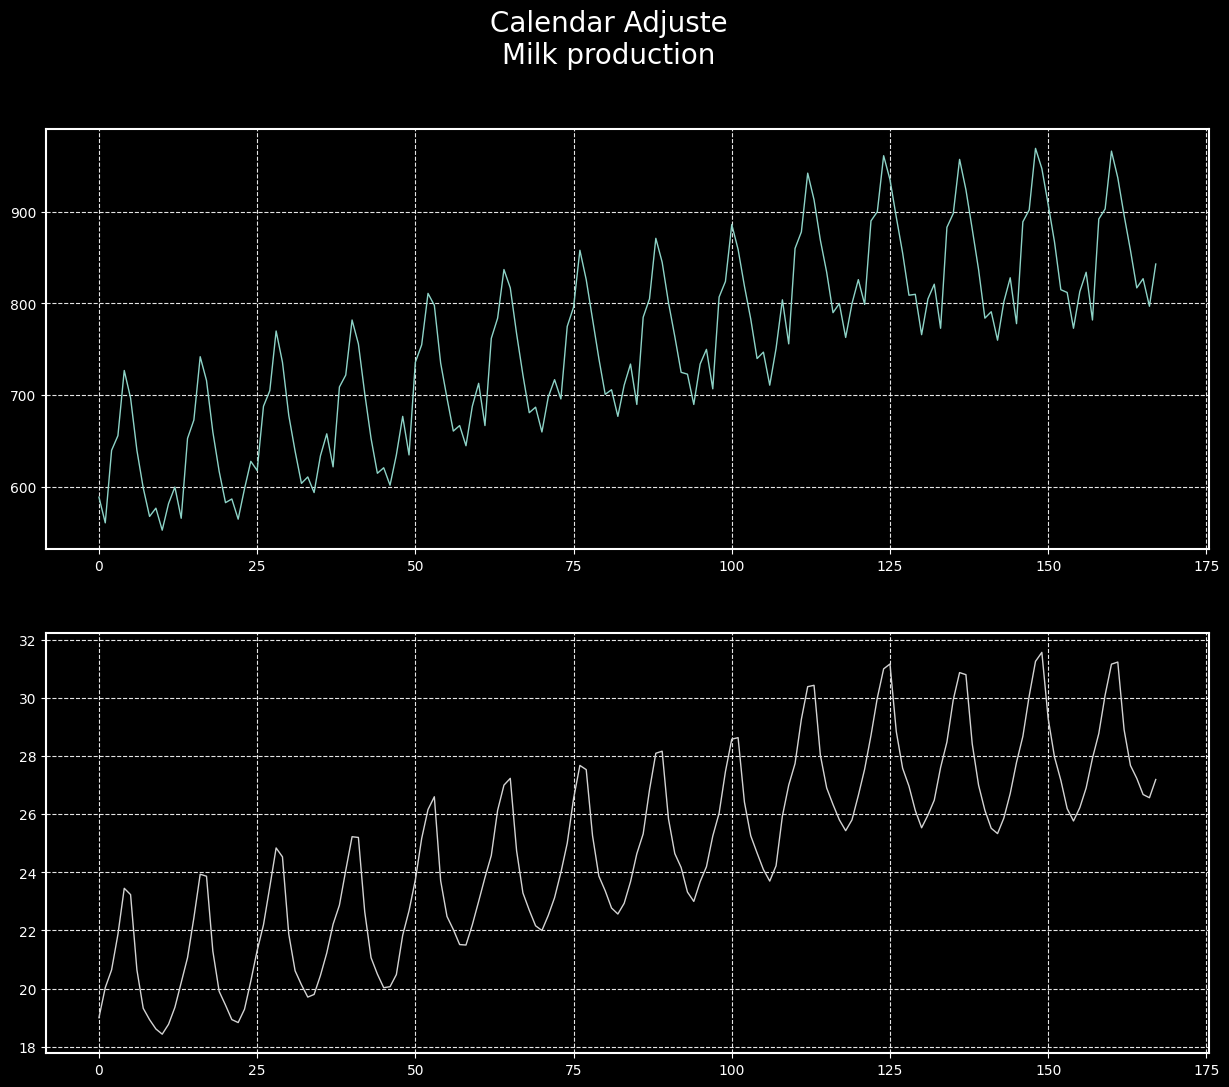

In [1145]:
get_transformed_plot(transformData2, 'Calendar Adjuste\nMilk production')

### Population Adjustment's

- Adjustments accounting for the changes in population, for example Number of Schools in the Country. That time series will carry more meaning if it were to be in the terms of Per Capita

In [1235]:
popenergy_data.head()

Population  Renewable_Energy_TWh  NonRenewable_Energy_TWh  \
1960-01-01  3.067248e+10                  9578                    31011   
1965-01-01  3.372133e+10                 10103                    40552   
1966-01-01  3.446703e+10                 10222                    42689   
1967-01-01  3.520994e+10                 10300                    44327   
1968-01-01  3.596666e+10                 10412                    47020   

            Nuclear_Energy_TWh  
1960-01-01                   0  
1965-01-01                  26  
1966-01-01                  34  
1967-01-01                  41  
1968-01-01                  52

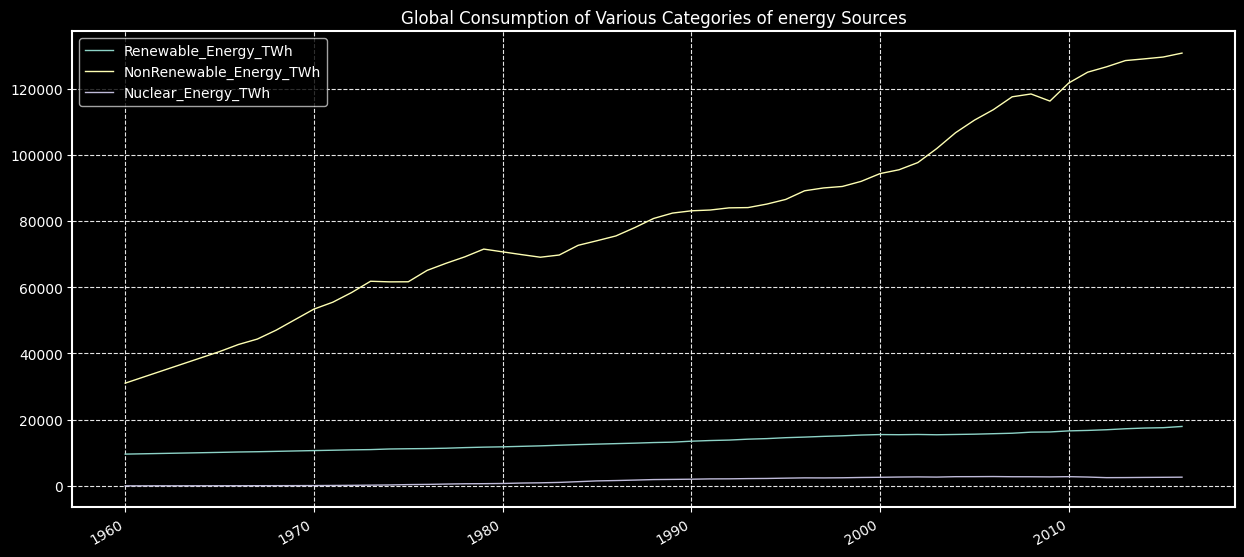

In [1238]:
_=popenergy_data.iloc[:,1:].plot(title='Global Consumption of Various Categories of energy Sources')

In [1247]:
popenergy_data['Renewable_Energy_TWh'] = popenergy_data['Renewable_Energy_TWh']/popenergy_data['Population']
popenergy_data['NonRenewable_Energy_TWh'] = popenergy_data['NonRenewable_Energy_TWh']/popenergy_data['Population']
popenergy_data['Nuclear_Energy_TWh'] = popenergy_data['Nuclear_Energy_TWh']/popenergy_data['Population']
popenergy_data.head()

Population  Renewable_Energy_TWh  NonRenewable_Energy_TWh  \
1960-01-01  3.067248e+10          1.018069e-17             3.296234e-17   
1965-01-01  3.372133e+10          8.884663e-18             3.566177e-17   
1966-01-01  3.446703e+10          8.604548e-18             3.593421e-17   
1967-01-01  3.520994e+10          8.308194e-18             3.575508e-17   
1968-01-01  3.596666e+10          8.048854e-18             3.634817e-17   

            Nuclear_Energy_TWh  
1960-01-01        0.000000e+00  
1965-01-01        2.286462e-20  
1966-01-01        2.862010e-20  
1967-01-01        3.307145e-20  
1968-01-01        4.019789e-20

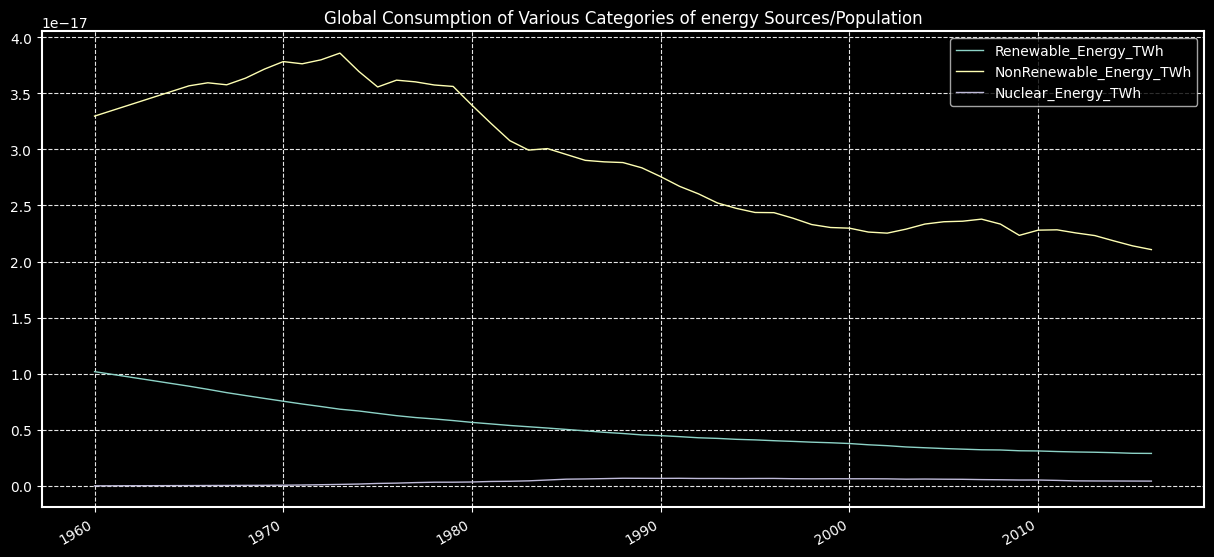

In [1248]:
_=popenergy_data.iloc[:,1:].plot(title='Global Consumption of Various Categories of energy Sources/Population')

### Inflation Adjustments

These adjustments are required when the working with financial data. Some object which costs @ $1,000.00 in 2020 might had costs @ $500.00 in 2005, but it doesnt neccesarily means that the `VALUE` of the object has been appreciated, as it might just be because of the inflation.

In [1313]:
housing_prices = houseprices_data.copy()
housing_prices.index = housing_prices.index.to_timestamp()
usa_cpi = usacpi_data[usacpi_data.index>='2008-03-01'].copy()
trnsformData3 = pd.merge(housing_prices, usa_cpi, left_index=True, right_index=True, how='inner')

In [1314]:
trnsformData3['Inflation_Adjusted_Price'] = trnsformData3['Price']/trnsformData3['CPI']
trnsformData3 = trnsformData3[trnsformData3.Region.isin(['Park Ridge'])]
trnsformData3 = trnsformData3.drop(['Region', 'CPI'], axis=1)
trnsformData3.rename(columns={'Price':'Actual'}, inplace=True)
trnsformData3.head()

Actual  Inflation_Adjusted_Price
2008-03-01  373500.0               1749.840711
2008-04-01  370900.0               1733.647437
2008-05-01  343900.0               1597.988922
2008-06-01  366000.0               1683.044932
2008-07-01  349600.0               1596.230412

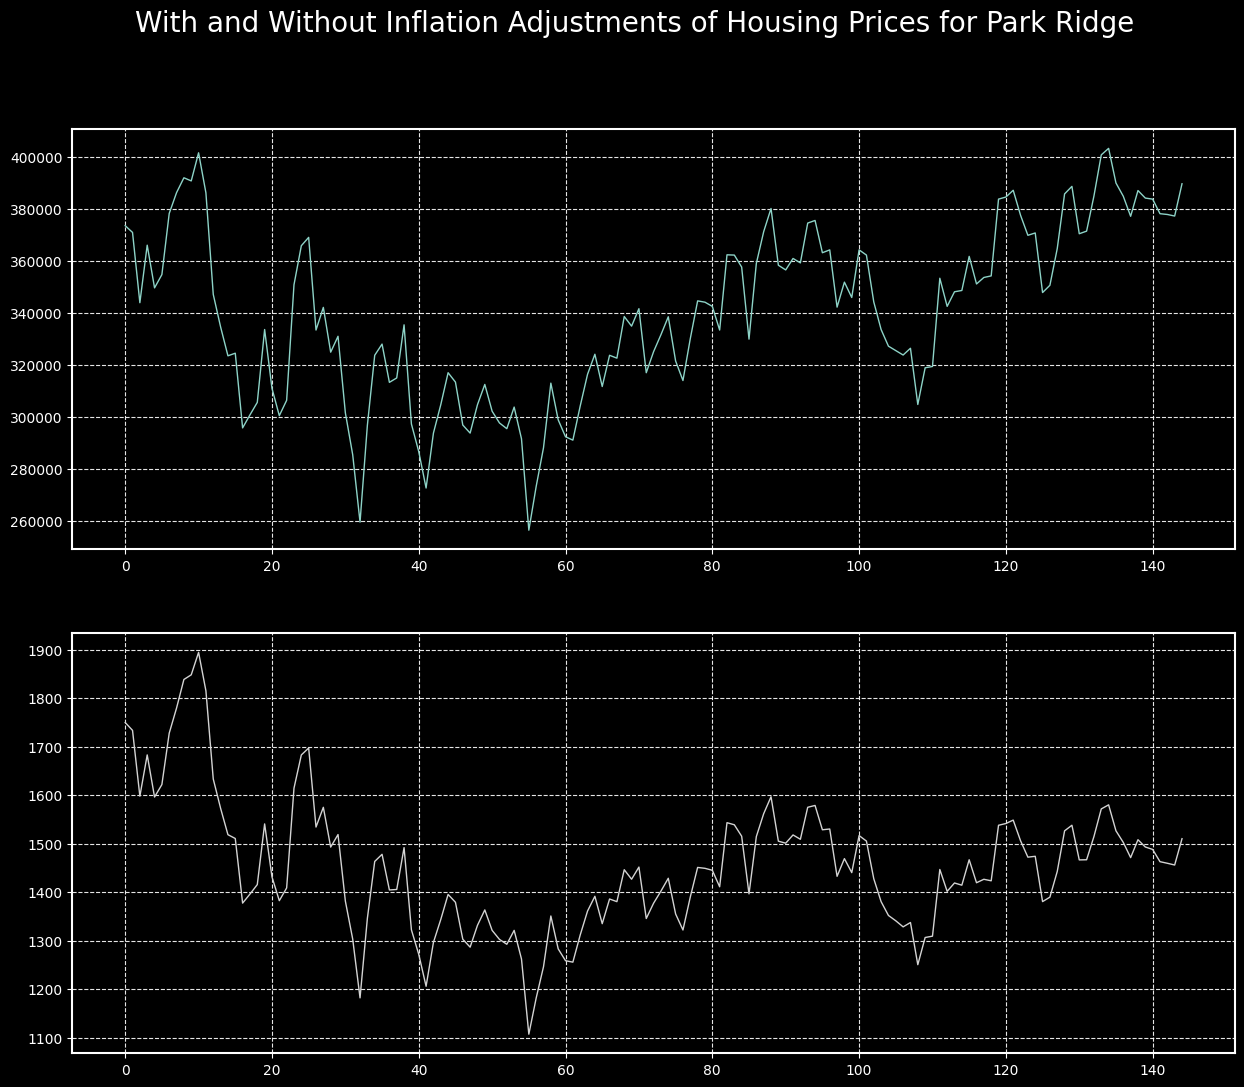

In [1315]:
get_transformed_plot(trnsformData3, 'With and Without Inflation Adjustments of Housing Prices for Park Ridge')

### Mathematical Transformations

Usually these are the transformations that you'd want to do away with the porblem of `Heteroskedacity` in your dataset, i.e `Variance` of the data changing its scale over time..

These transformations include :-
- Natural Log
- Square Root, Cube Root 
- Box-Cox Transformation

# Time Series Visualisations

# Time Series Decomposition

# Random Testing Space